### Abgabe 2: Regression
M.Sc. Operations Management: Datenanalyse 

Abgabetermin 10. Juni 2024





# Einleitung
### Zielsetzung

Das Ziel dieser Analyse ist es, die Faktoren zu identifizieren, die für Übergewicht verantwortlich sind. Übergewicht ist ein komplexes Gesundheitsproblem, das durch eine Vielzahl von Faktoren beeinflusst werden kann, einschließlich, aber nicht beschränkt auf, Ernährung, körperliche Aktivität, genetische Veranlagung und Lebensstil. Die Identifikation dieser Faktoren ist entscheidend, um gezielte Präventionsmaßnahmen und Interventionen zu entwickeln.

In dieser Arbeit verwenden wir einen Datensatz, der verschiedene potenziell einflussreiche Variablen enthält. Der Datensatz umfasst demografische Informationen (wie Geschlecht und Alter), Verhaltensweisen (wie Essgewohnheiten und körperliche Aktivität), und andere relevante Faktoren.

Das Ziel der Modellerstellung ist die Vorhersage von Übergewicht.

Wir erstellen und optimieren (mit teilweise gemeinsam genutzten Optimierungsverfahren) insgesamt zwei Modelle:

 - Ein erstes Modell, welches "sorgfältig" mittels diversen Techniken aus Vorlesung sowie Selbststudium erstellt wurde. --> Führt zu einem gut erklärbaren, mittelmäßigen Modell.
 - Ein zweites Modell, welches mittels Polynomialvariablen und logarithmierten BMI nicht-lineare Zusammenhänge im Datensatz abbilden kann. --> Führt zu einem eher komplizierten aber dafür wesentlich stärkeren Modell.

Dieser zweigleisige Ansatz ermöglicht es, die relativen Einflüsse der verschiedenen Faktoren auf das Übergewicht genauer zu untersuchen und zu bewerten.

# Datenbeschaffung und erste Sichtung

#### Begründung des Vorgehens

Gegeben ist der Datensatz "gewicht2026.csv". Dieser Datensatz enthält eine Vielzahl von Variablen, die potenziell Einfluss auf das Übergewicht haben könnten (was es herauszufinden gilt). 

Wir beginnen mit dem Import der notwendigen Bibliotheken `pandas` und `numpy`, die hier unsere grundlegenden Werkzeuge für die Datenanalyse sind. Um eine vollständige Ansicht der Daten zu ermöglichen, heben wir die Anzeigeeinschränkungen für die Anzahl der Zeilen und Spalten im DataFrame auf (bei der Arbeit mit den Daten oft von Vorteil, im gedruckten Assignment natürlich nicht enthalten).

In [35]:
import pandas as pd
import numpy as np
raw_dataframe = pd.read_csv("gewicht2026.csv", sep=";") 
%matplotlib inline

# remove display limitation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Datenüberprüfung und -vorbearbeitung

#### Erste Überprüfung

Wir beginnen mit einer Gesamtansicht der Daten, um einen Eindruck von der Struktur und dem Inhalt des Datensatzes zu gewinnen. Diese Übersicht hilft uns, potenzielle Probleme wie fehlende oder fehlerhafte Daten zu identifizieren.

Die folgenden Methoden sind zur Vorbearbeitung der Daten notwendig und wir werden diese in den folgenden Abschnitten wiederfinden:

- **Datenbereinigung**: Entfernen von unvollständigen oder fehlerhaften Daten. --> i.d.F. sind die Daten vollständig und enthalten keine offensichtlichen Fehler.
- **Datentypen transformieren**: Sicherstellen, dass alle Spalten die korrekten Datentypen haben.
- **Dummy-Variablen erstellen**: Kategorische Variablen in numerische Dummy-Variablen umwandeln. --> Immens wichtig, da oft unzureichende Informationen über die genaue Erhebung einiger Variablen existiert.
- **Daten visualisieren**: Grafische Darstellung der Daten zum besseren Verständnis, speziell bei der Umwandlung in BMI.
- **Ausreißer entfernen**: Identifizieren und Entfernen von Ausreißern mit statistischen Methoden wie Cook's Distance.
- **Multikollinearität prüfen**: Untersuchung der Multikollinearität durch Korrelationsmatrizes, -tabellen und VIF Scores.

In [36]:
raw_dataframe.head()
# display(raw_dataframe)

,Geschlecht,Alter,Größe,Gewicht,Augenfarbe,Beruf,Schlaf,Kalorienreich,Gemüse,Anzahl_Mahlzeiten,Zwischen_Mahlzeiten,Raucher,Wasser,Kalorien_Zählen,Sport,Geräte,Alkohol,Vorgeschichte_Familie,Weg_Arbeit,Level
0,weiblich,"21,0","1,62","64,0",braun,Selbstständig,"7,1",nein,2,3,Gelegentlich,nein,2,nein,0,1,nein,ja,Öffentliche,Normalgewicht
1,weiblich,"21,0","1,52","56,0",blau,Selbstständig,"6,2",nein,3,3,Gelegentlich,ja,3,ja,3,0,Gelegentlich,ja,Öffentliche,Normalgewicht
2,männlich,"23,0","1,8","77,0",braun,Rentner,"8,2",nein,2,3,Gelegentlich,nein,2,nein,2,1,Häufig,ja,Öffentliche,Normalgewicht
3,männlich,"27,0","1,8","87,0",blau,Beamter,"7,3",nein,3,3,Gelegentlich,nein,2,nein,2,0,Häufig,nein,Laufen,Übergewicht_Leicht
4,männlich,"22,0","1,78","89,8",braun,Beamter,"7,2",nein,2,1,Gelegentlich,nein,2,nein,0,0,Gelegentlich,nein,Öffentliche,Übergewicht_Stark


In [37]:
raw_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geschlecht             2026 non-null   object
 1   Alter                  2026 non-null   object
 2   Größe                  2026 non-null   object
 3   Gewicht                2026 non-null   object
 4   Augenfarbe             2026 non-null   object
 5   Beruf                  2026 non-null   object
 6   Schlaf                 2026 non-null   object
 7   Kalorienreich          2026 non-null   object
 8   Gemüse                 2026 non-null   int64 
 9   Anzahl_Mahlzeiten      2026 non-null   int64 
 10  Zwischen_Mahlzeiten    2026 non-null   object
 11  Raucher                2026 non-null   object
 12  Wasser                 2026 non-null   int64 
 13  Kalorien_Zählen        2026 non-null   object
 14  Sport                  2026 non-null   int64 
 15  Geräte               

Die erste Ansicht des Datensatzes zeigt eine Vorschau der ersten fünf Zeilen, was uns einen ersten Eindruck von den Daten gibt. Um eine umfassendere Einsicht zu erhalten, überprüfen wir die Struktur des Datensatzes und suchen nach fehlenden Werten.

- Die Funktion `info()` liefert uns grundlegende Informationen über die Spaltennamen, den Datentyp jeder Spalte und die Anzahl der NaN-Werte. 
- Die Überprüfung auf fehlende Werte zeigt, dass unser Datensatz glücklicherweise keine fehlenden Werte enthält, was uns extra Arbeit erspart.

## Data Munge: Bereinigung des Datensatzes

### Begründung des Vorgehens

Der Data Munge-Prozess umfasst mehrere wichtige Schritte, um die Daten für die Analyse und Modellierung vorzubereiten. Zuerst wird die Datenbereinigung durchgeführt, bei der unvollständige oder fehlerhafte Daten entfernt werden. Es wird sichergestellt, dass alle Spalten die korrekten Datentypen haben, und kategoriale Variablen werden in numerische Dummy-Variablen umgewandelt.

Relevante Variablen aus den vorhandenen Daten müssen erstellt werden, um zusätzliche Informationen für die Analyse bereitzustellen.

Die Normalisierung oder Standardisierung der numerischen Daten ist notwendig, um sicherzustellen, dass alle numerischen Daten auf vergleichbaren Skalen liegen, was die Modellleistung verbessert.

Diese Schritte stellen sicher, dass die Daten in einem optimalen Zustand für die nachfolgende Analyse und Modellerstellung vorliegen.

Zunächsten haben wir die numerischen Daten in das richtige Format umgewandelt und den Body Mass Index (BMI) berechnet, der als wichtiges Merkmal (Zielwert, Abhängige Variable, y) für unsere Analyse dient.


In [38]:
for column_with_wrong_number_format in ['Alter','Größe','Gewicht','Schlaf']:
    raw_dataframe[column_with_wrong_number_format] = raw_dataframe[column_with_wrong_number_format].str.replace(',', '.').astype(float).round(2)

# add BMI
import numpy as np
raw_dataframe['BMI'] = ( (raw_dataframe['Gewicht'] / (raw_dataframe['Größe'] ** 2)) ).round(2)
# raw_dataframe['BMI'] = (raw_dataframe['Gewicht'] / (raw_dataframe['Größe'] ** 2)).round(2)
raw_dataframe.head()

,Geschlecht,Alter,Größe,Gewicht,Augenfarbe,Beruf,Schlaf,Kalorienreich,Gemüse,Anzahl_Mahlzeiten,Zwischen_Mahlzeiten,Raucher,Wasser,Kalorien_Zählen,Sport,Geräte,Alkohol,Vorgeschichte_Familie,Weg_Arbeit,Level,BMI
0,weiblich,21.0,1.62,64.0,braun,Selbstständig,7.1,nein,2,3,Gelegentlich,nein,2,nein,0,1,nein,ja,Öffentliche,Normalgewicht,24.39
1,weiblich,21.0,1.52,56.0,blau,Selbstständig,6.2,nein,3,3,Gelegentlich,ja,3,ja,3,0,Gelegentlich,ja,Öffentliche,Normalgewicht,24.24
2,männlich,23.0,1.80,77.0,braun,Rentner,8.2,nein,2,3,Gelegentlich,nein,2,nein,2,1,Häufig,ja,Öffentliche,Normalgewicht,23.77
3,männlich,27.0,1.80,87.0,blau,Beamter,7.3,nein,3,3,Gelegentlich,nein,2,nein,2,0,Häufig,nein,Laufen,Übergewicht_Leicht,26.85
4,männlich,22.0,1.78,89.8,braun,Beamter,7.2,nein,2,1,Gelegentlich,nein,2,nein,0,0,Gelegentlich,nein,Öffentliche,Übergewicht_Stark,28.34


### Merkmalsausprägungen prüfen
Um einen besseren Überblick über die Merkmale und ihre Ausprägungen zu erhalten, iterieren wir über die Spalten und drucken die einzigartigen Werte je Spalte.

In [39]:
# Iterate over columns and print unique values if the datatype is not float64
for column in raw_dataframe.columns:
    if raw_dataframe[column].dtype != 'float64':
        unique_values = raw_dataframe[column].unique()
        print(f"Merkmalsausprägungen '{column}':"," "*(25-len(column)), unique_values)

for_boxplot_df = raw_dataframe.copy()

Merkmalsausprägungen 'Geschlecht':                 ['weiblich' 'männlich']
Merkmalsausprägungen 'Augenfarbe':                 ['braun' 'blau' 'grün']
Merkmalsausprägungen 'Beruf':                      ['Selbstständig' 'Rentner' 'Beamter' 'Angestellter']
Merkmalsausprägungen 'Kalorienreich':              ['nein' 'ja']
Merkmalsausprägungen 'Gemüse':                     [2 3 1]
Merkmalsausprägungen 'Anzahl_Mahlzeiten':          [3 1 4 2]
Merkmalsausprägungen 'Zwischen_Mahlzeiten':        ['Gelegentlich' 'Häufig' 'Täglich' 'nein']
Merkmalsausprägungen 'Raucher':                    ['nein' 'ja']
Merkmalsausprägungen 'Wasser':                     [2 3 1]
Merkmalsausprägungen 'Kalorien_Zählen':            ['nein' 'ja']
Merkmalsausprägungen 'Sport':                      [0 3 2 1]
Merkmalsausprägungen 'Geräte':                     [1 0 2]
Merkmalsausprägungen 'Alkohol':                    ['nein' 'Gelegentlich' 'Häufig' 'Täglich']
Merkmalsausprägungen 'Vorgeschichte_Familie':      ['ja' 'nein']

Durch die Überprüfung der Merkmalsausprägungen können wir sicherstellen, dass die Daten korrekt kodiert sind und keine unerwarteten Werte enthalten.


### Umwandlung kategorischer Variablen

Ordinale Kategorien wie „Zwischen_Mahlzeiten“ oder "Alkohol" wurden zunächst in Ganzzahlen umgewandelt, da sie eine natürliche Reihenfolge aufweisen. Nominale Daten wie Augenfarbe sowie binäre Daten wie Ja/Nein-Fragen werden in Dummy-Variablen oder mittels One-Hot-Encoding umgewandelt. Im Laufe des Projekts zeigte sich, dass Variablen wie „Zwischen_Mahlzeiten“, „Gemüse“, „Alkohol“, „Geräte“ und „Sport“ keinen linearen Zusammenhang aufweisen und daher ebenfalls in Dummy-Variablen umgewandelt wurden, um unser Modell zu verbessern.

Dies umfasst auch die Umwandlung von Geschlecht und Ja/Nein-Fragen in 1 und 0.

### Exkurs Multikollinearitätsprüfung

In der später durchgeführten Multikollinearitätsprüfung des Datensatzes wurden hohe Kollinearitätswerte festgestellt, die vor allem durch die Erstellung von Dummy-Variablen bedingt waren. Diese zeigen perfekte Kollinearität untereinander. Um dieses Problem zu adressieren, haben wir entsprechend der im Unterricht besprochenen Methodik eine der Dummy-Variablen mittels `drop_first=True` als Referenzvariable entfernt.

In [40]:
# hf_mapping = {'Gelegentlich': 1, 'Häufig': 3, 'Täglich': 2, 'nein': 0}
# hf_columns = ['Zwischen_Mahlzeiten','Alkohol']
# for hf_col in hf_columns:
#     raw_dataframe[hf_col] = raw_dataframe[hf_col].map(hf_mapping)

gender_mapping = {'weiblich': 0, 'männlich': 1} # not sexist, just for convenience to avoid dummy var!!! <3
raw_dataframe['Geschlecht'] = raw_dataframe['Geschlecht'].map(gender_mapping)

# Map yes and no
yes_no_mapping = {'nein': 0, 'ja': 1}
yes_no_columns = ['Kalorienreich','Raucher','Kalorien_Zählen','Vorgeschichte_Familie']
for yn_col in yes_no_columns:
    raw_dataframe[yn_col] = raw_dataframe[yn_col].map(yes_no_mapping)


dummy_columns = ['Anzahl_Mahlzeiten','Wasser','Augenfarbe','Beruf','Weg_Arbeit','Zwischen_Mahlzeiten','Alkohol','Sport','Gemüse','Geräte']
raw_dataframe = pd.get_dummies(raw_dataframe, columns=dummy_columns, drop_first=True)
for column in raw_dataframe.columns:
    if column.startswith(tuple(dummy_columns)):
        raw_dataframe[column] = raw_dataframe[column].astype(int)
raw_dataframe.head()

,Geschlecht,Alter,Größe,Gewicht,Schlaf,Kalorienreich,Raucher,Kalorien_Zählen,Vorgeschichte_Familie,Level,BMI,Anzahl_Mahlzeiten_2,Anzahl_Mahlzeiten_3,Anzahl_Mahlzeiten_4,Wasser_2,Wasser_3,Augenfarbe_braun,Augenfarbe_grün,Beruf_Beamter,Beruf_Rentner,Beruf_Selbstständig,Weg_Arbeit_Bike,Weg_Arbeit_Laufen,Weg_Arbeit_Motorrad,Weg_Arbeit_Öffentliche,Zwischen_Mahlzeiten_Häufig,Zwischen_Mahlzeiten_Täglich,Zwischen_Mahlzeiten_nein,Alkohol_Häufig,Alkohol_Täglich,Alkohol_nein,Sport_1,Sport_2,Sport_3,Gemüse_2,Gemüse_3,Geräte_1,Geräte_2
0,0,21.0,1.62,64.0,7.1,0,0,0,1,Normalgewicht,24.39,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
1,0,21.0,1.52,56.0,6.2,0,1,1,1,Normalgewicht,24.24,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
2,1,23.0,1.80,77.0,8.2,0,0,0,1,Normalgewicht,23.77,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0
3,1,27.0,1.80,87.0,7.3,0,0,0,0,Übergewicht_Leicht,26.85,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,1,22.0,1.78,89.8,7.2,0,0,0,0,Übergewicht_Stark,28.34,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


## Analyse Zusammenhang BMI und Level

In [41]:
# Für die Nutzung des BMI als Y müssen wir die ursprüngliche Aufteilung wiederherstellen
# Wir müssen herausfinden, welche Grenzen die Eigenschaft "Level" hat i.S.d BMIs
grouped_raw_df = raw_dataframe.groupby('Level')

# Iterate over each group
for name, group in grouped_raw_df:
    # Print the minimum and maximum BMI for the current group
    print(f"Level: {name}")
    print(f"Minimum BMI: {group['BMI'].min()}  Maximum BMI: {group['BMI'].max()}")
    print()

Level: Fettleibig
Minimum BMI: 29.81  Maximum BMI: 35.27

Level: Normalgewicht
Minimum BMI: 18.49  Maximum BMI: 24.91

Level: Sehr_Stark_Fettleibig
Minimum BMI: 36.68  Maximum BMI: 50.82

Level: Stark_Fettleibig
Minimum BMI: 33.89  Maximum BMI: 39.81

Level: Untergewicht
Minimum BMI: 13.0  Maximum BMI: 19.1

Level: Übergewicht_Leicht
Minimum BMI: 22.86  Maximum BMI: 28.71

Level: Übergewicht_Stark
Minimum BMI: 25.69  Maximum BMI: 30.36



Durch die Analyse der BMI-Grenzwerte für jede 'Level'-Kategorie konnten wir die Intervallgrenzen präziser festlegen, um die Klassifizierung zu verbessern.


In unserer Analyse zeigten sich erhebliche Überlappungen der BMI-Werte im blauen Boxplot. Um eine präzisere Klassifizierung zu erreichen, haben wir die Intervallgrenzen der BMI-Kategorien manuell angepasst, unter Zuhilfenahme von https://de.wikipedia.org/wiki/Body-Mass-Index. Diese Anpassung hilft, die Genauigkeit unserer Datenkategorisierung zu verbessern.

### Boxplot-Visualisierung der BMI-Kategorien

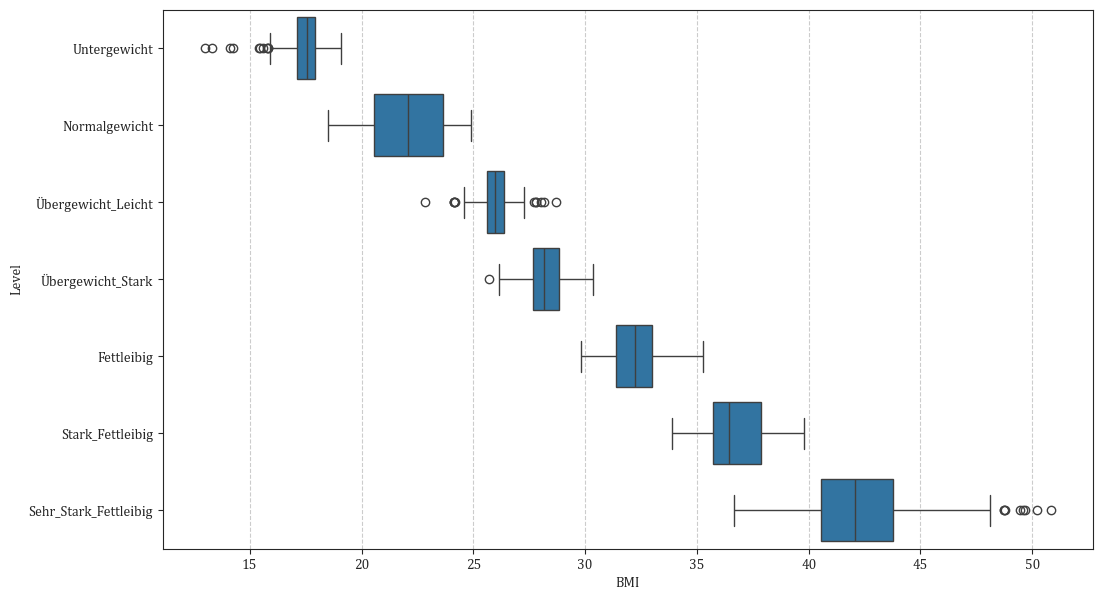

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns

order = ['Untergewicht', 'Normalgewicht', 'Übergewicht_Leicht', 'Übergewicht_Stark', 
         'Fettleibig', 'Stark_Fettleibig', 'Sehr_Stark_Fettleibig']
figsize = (12, len(for_boxplot_df['Level'].unique()))
plt.figure(figsize=figsize)
sns.boxplot(for_boxplot_df, x='BMI', y='Level', order=order)
plt.grid(axis='x', linestyle='--', alpha=1)  # Insert vertical gridlines
plt.show()

### Interpretation

Der blaue Boxplot zeigt die Verteilung der errechneten BMI-Werte über verschiedene Kategorien aus "Level". Die Boxplots illustrieren

Einige Kategorien, speziell "Stark_Fettleibig" und Übergewicht_Leicht, zeigen eine erhebliche Überlappung der BMI-Bereiche. Dies deutet darauf hin, dass die Abgrenzungen zwischen diesen Kategorien möglicherweise nicht allein über den BMI zu erklären sind. 

Auffällige Ausreißer in Kategorien wie "Untergewicht" und "Sehr Stark Fettleibig" zeigen extreme BMI-Werte an, die außerhalb des typischen Bereichs der Kategorie liegen.

### Anpassung der BMI-Kategorien

Um die Trennschärfe der BMI-Kategorien zu verbessern, haben wir die Klassifizierungsgrenzen für die BMI-Kategorien manuell angepasst. Diese Anpassung basierte auf anerkannten BMI-Grenzwerten aus der Literatur (z.B. Wikipedia) und unserer eigenen Analyse der Verteilung der BMI-Werte.

In [43]:
def get_bmi_category(bmi_value: float) -> str:

    """
    'Untergewicht': (0, 18.5),
        'Normalgewicht': (18.5, 25),
        'Übergewicht_Leicht': (25, 27.5),
        'Übergewicht_Stark': (27.5, 30),
        'Fettleibig': (30, 35),
        'Stark_Fettleibig': (35, 37.5),
        'Sehr_Stark_Fettleibig': (37.5, 200)
    """
    categories = {
        'Untergewicht': (0, 18.5),
        'Normalgewicht': (18.5, 25),
        'Übergewicht_Leicht': (25, 27.5),
        'Übergewicht_Stark': (27.5, 30),
        'Fettleibig': (30, 35),
        'Stark_Fettleibig': (35, 37.5),
        'Sehr_Stark_Fettleibig': (37.5, 200), # BMI 200? No problem: https://de.wikipedia.org/wiki/Jon_Brower_Minnoch 
    }
    
    # bmi_value = (bmi_value**6)

    for category, (min_bmi, max_bmi) in categories.items():
        # Check if the BMI value falls within the range of the current category
        if bmi_value >= min_bmi and bmi_value < max_bmi:
            return category
    
    # If the BMI value does not fall within any range, return None
    return None

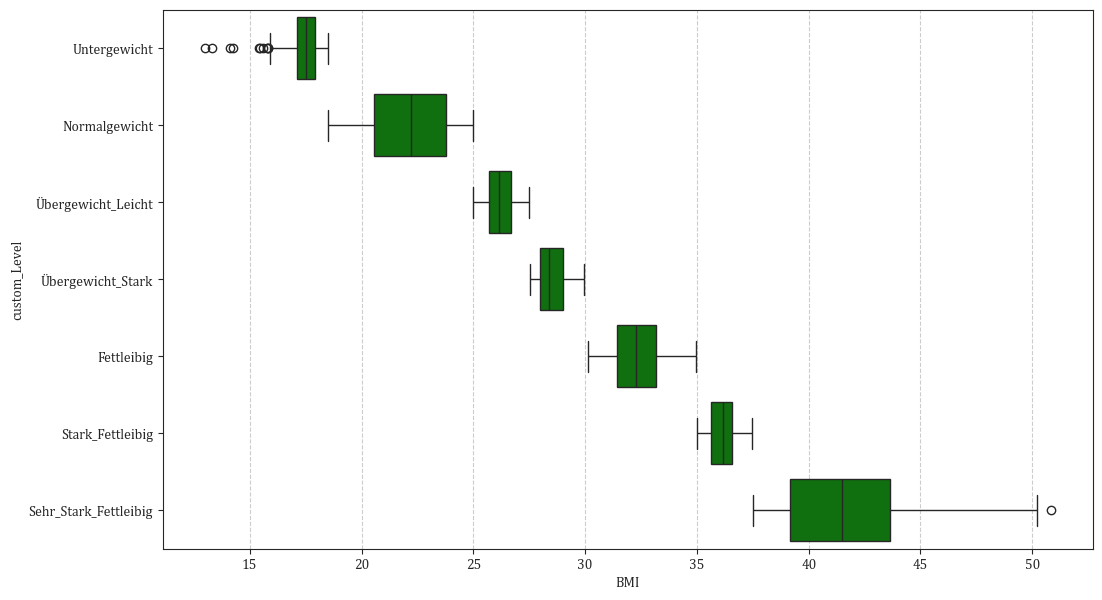

In [44]:
for_boxplot_df['custom_Level'] = for_boxplot_df.apply(lambda row: get_bmi_category(row['BMI']),axis=1)

order = ['Untergewicht', 'Normalgewicht', 'Übergewicht_Leicht', 'Übergewicht_Stark', 
         'Fettleibig', 'Stark_Fettleibig', 'Sehr_Stark_Fettleibig']
figsize = (12, len(for_boxplot_df['custom_Level'].unique()))
plt.figure(figsize=figsize)
sns.boxplot(for_boxplot_df, x='BMI', y='custom_Level',color="green", order=order)
plt.grid(axis='x', linestyle='--', alpha=1)  # Insert vertical gridlines
plt.show()




### Interpretation 

Der Boxplot zeigt die Verteilung des Body Mass Index (BMI) in Bezug auf unsere via `get_bmi_category()` definierten Gewichtskategorien. Es ist deutlich zu erkennen, dass es keine Überschneidungen mehr zwischen den Kategorien gibt.

#### Doppelseitiges Schwert

Auch wenn uns aus statistischer Sicht eine klare Abtrennung das Leben erleichtert geht dadurch auch Information verloren, z.B. die Sonderfälle des BMIs (z.B. bei Bodybuildern) sowie vielleicht weitere medizinische Gutachten welche zur Kategorisierung nach "Level" beigetragen haben.

In [45]:
raw_dataframe.drop(columns=["Level","Größe","Gewicht"], inplace=True)
raw_dataframe.head()
raw_dataframe.info()

numeric_dataframe = raw_dataframe.copy()
poly_data = numeric_dataframe.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Geschlecht                   2026 non-null   int64  
 1   Alter                        2026 non-null   float64
 2   Schlaf                       2026 non-null   float64
 3   Kalorienreich                2026 non-null   int64  
 4   Raucher                      2026 non-null   int64  
 5   Kalorien_Zählen              2026 non-null   int64  
 6   Vorgeschichte_Familie        2026 non-null   int64  
 7   BMI                          2026 non-null   float64
 8   Anzahl_Mahlzeiten_2          2026 non-null   int32  
 9   Anzahl_Mahlzeiten_3          2026 non-null   int32  
 10  Anzahl_Mahlzeiten_4          2026 non-null   int32  
 11  Wasser_2                     2026 non-null   int32  
 12  Wasser_3                     2026 non-null   int32  
 13  Augenfarbe_braun  

### Entfernung irrelevanter Spalten und Datenüberprüfung
Nach der Anpassung der BMI-Kategorien und der Verbesserung der Trennschärfe unserer Zielvariablen haben wir die Spalten "Level", "Größe" und "Gewicht" aus unserem DataFrame entfernt.

#### Begründung:

- Level: Die ursprüngliche y-Variable ist nun durch BMI ersetzt worden.

- Größe und Gewicht: Diese Variablen wurden zur Berechnung des BMI verwendet. Da der BMI eine Kombination dieser beiden Variablen darstellt und direkt in unsere Modelle eingeht, sind diese X-Variablen nicht mehr notwendig. Durch ihre immense Korrelation mit dem BMI würden sie die anderen Einflußfaktoren überdecken.

Das Kopieren des DataFrames stellt sicher, dass wir eine konsistente und unveränderte Version des bereinigten Datensatzes für verschiedene analytische Schritte zur Verfügung haben.


## Überprüfen der Korrelationen
### Begründung des Vorgehens

Die Korrelationsanalyse ist ein wichtiger Schritt, um zu verstehen, wie unterschiedliche Variablen in Beziehung zum BMI stehen. Durch die Berechnung der Korrelationen können wir erkennen, welche Merkmale den größten Einfluss auf den BMI haben und welche möglicherweise vernachlässigbar sind. Diese Informationen sind essenziell, um gezielte Hypothesen für weiterführende Analysen aufzustellen und um die Datenbereinigung und -auswahl für präzisere Modelle vorzubereiten.

Die Verwendung von `.corr()` in Python ermöglicht eine schnelle und effiziente Bewertung der linearen Zusammenhänge zwischen dem BMI und anderen Variablen im DataFrame. Wir nutzen die Beträge, da uns aktuell einzig die absolute Korrelation interessiert und später präzisere Analysen durchgeführt werden.

In [46]:
correlation = numeric_dataframe.corr()['BMI'].abs().sort_values(ascending=False)
correlation

BMI                            1.000000
Vorgeschichte_Familie          0.482365
Zwischen_Mahlzeiten_Häufig     0.393065
Sport_2                        0.296951
Gemüse_3                       0.286098
Geräte_1                       0.255347
Kalorienreich                  0.245575
Alter                          0.244050
Gemüse_2                       0.222710
Alkohol_nein                   0.213038
Anzahl_Mahlzeiten_4            0.203933
Kalorien_Zählen                0.186512
Anzahl_Mahlzeiten_3            0.162522
Geräte_2                       0.138106
Sport_3                        0.128083
Sport_1                        0.127594
Weg_Arbeit_Laufen              0.124776
Zwischen_Mahlzeiten_Täglich    0.107349
Weg_Arbeit_Öffentliche         0.092572
Wasser_3                       0.088719
Zwischen_Mahlzeiten_nein       0.084562
Wasser_2                       0.076868
Alkohol_Häufig                 0.064312
Geschlecht                     0.048250
Beruf_Rentner                  0.041556


### Interpretation
Die Korrelationsanalyse liefert einen Einblick in die Beziehung zwischen BMI und verschiedenen anderen Variablen. Unsere Kurzanalyse hier konzentriert sich auf entweder sehr hohe oder sehr niedrige Korrelationswerte (ob positiv oder negativ interessiert uns an dieser Stelle noch nicht), da diese für unser Modell von besonderem Interesse sind. Die signifikanten Korrelationen bieten wichtige Einblicke:

- **Vorgeschichte_Familie** zeigt eine deutliche Korrelation, was darauf hinweist, dass familiäre Vorbelastungen einen bedeutenden Einfluss auf den BMI haben können.
- **Zwischen_Mahlzeiten_Häufig** und **Sport_2** folgen als signifikante Faktoren, was nahelegt, dass Ernährungsgewohnheiten und bestimmte Sportarten merklich mit dem BMI zusammenhängen.
- Andere Variablen wie **Gemüse_3**, **Geräte_1**, und **Kalorienreich** haben ebenfalls starke Korrelationen.
- Schwächere Korrelationen finden sich bei Faktoren wie **Alkohol_nein** und **Kalorien_Zählen**, die dennoch relevante Einblicke in Lebensgewohnheiten bieten, die potenziell den BMI beeinflussen.

### Ableitung für Praxis und weiteres Vorgehen

Aus Praxissicht sind diese Daten entscheidend für das Verstehen der verschiedenen Einflüsse auf den BMI und welche Faktoren möglicherweise in Interventionsstrategien zur Gewichtsregulierung einbezogen werden sollten. Hier könnte man also die Datenerhebung ausweiten und detaillierter gestalten um noch mehr Wert aus derartigen Daten zu ziehen.

Die hier genannten Kategorien werden sich, insofern die nächsten Schritte den Datensatz nicht grundlegend ändern oder diese Variablen während der VIF-Säuberung das Zeitliche segnen, wahrscheinlich auch in unserem finalen Modell wiederfinden.

### Next Steps

Weiterhin müssen wir die Kollinearität zwischen den Variablen überprüfen, um sicherzustellen, dass keine redundante oder überlappende Information unsere Modellergebnisse verzerrt. Dies geschieht mittels einer weiterführenden Korrelationsanalyse, welche uns helfen wird, die Validität und Zuverlässigkeit unserer Vorhersagen zu erhöhen.

## Erstes Lineares Modell als Ausgangspunkt für Anhaltspunkt für weitere Untersuchungen
### Begründung des Vorgehens

Das Erstellen eines ersten linearen Modells ist ein üblicher Ansatz, um ein initiales Verständnis der Daten und ihrer Beziehungen zu gewinnen. Es hilft dabei, wichtige Variablen zu identifizieren, die möglicherweise einen starken Einfluss auf die Zielvariable haben, und gibt Hinweise darauf, welche Variablen möglicherweise irrelevant sind.

Die Verwendung von statsmodels.api zur Durchführung einer OLS (Ordinary Least Squares)-Regression ist eine robuste Methode, die nicht nur Schätzungen der Koeffizienten liefert, sondern auch umfassende Statistiken, die zur Beurteilung der Modellgüte und der Signifikanz der Prädiktoren nützlich sind. Das Einbeziehen einer Konstanten durch sm.add_constant stellt sicher, dass der Achsenabschnitt nicht ignoriert wird, was für die Vollständigkeit des Modells entscheidend ist.

Das Vorliegen einer hohen Konditionszahl, wie im Modellbericht angegeben, weist auf potenzielle Multikollinearitätsprobleme hin. Dieses Signal ist wichtig, da es darauf hinweist, dass einige Variablen möglicherweise hochkorreliert sind, was zu Verzerrungen in den geschätzten Koeffizienten führen kann. Die Beachtung solcher Warnungen ist entscheidend für die Durchführung weiterer Datenbereinigungen und Modellanpassungen in nachfolgenden Analyseschritten.

In [47]:
import statsmodels.api as sm

X_values_first = numeric_dataframe.copy()
X_values_first.drop(columns="BMI",inplace=True)
y_values_first = numeric_dataframe.copy()
y_values_first = y_values_first["BMI"]

Xsm_test = sm.add_constant(X_values_first)
# Fit the OLS model
first_model = sm.OLS(y_values_first, Xsm_test).fit()
# Get predictions
predictions = first_model.predict(Xsm_test) 
# Print model summary
print_model = first_model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     77.10
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:47:34   Log-Likelihood:                -6247.2
No. Observations:                2026   AIC:                         1.256e+04
Df Residuals:                    1991   BIC:                         1.276e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Interpretation

Das erste lineare Modell wurde erstellt, um die Beziehung zwischen verschiedenen Variablen und dem BMI zu analysieren und um grundlegende Anhaltspunkte für weiterführende Untersuchungen zu bieten. 

Der Modellauszug zeigt einige wichtige Statistiken:

- **R-squared von 0.568**: Dies deutet darauf hin, dass etwa 56.8% der Varianz im BMI durch die unabhängigen Variablen im Modell erklärt werden können, was auf eine mäßige Anpassungsgüte hinweist.
- **F-Statistik (84.42)** und **P-Wert nahe 0**: Diese Werte bestätigen, dass das Modell statistisch signifikante prädiktive Fähigkeiten hat.
- **Signifikante Variablen**: Einige Variablen wie Alter, Kalorienreich, Anzahl_Mahlzeiten, Kalorien_Zählen und Vorgeschichte_Familie zeigen deutliche und signifikante t-Werte, was darauf hinweist, dass sie starke Prädiktoren für den BMI sind. Die meisten davon decken sich auch mit unseren Erkenntnissen aus der Korrelationstabelle im vorherigen Schritt.
- **Nicht signifikante Variablen**: Andere, wie Geschlecht, Schlaf, Raucher und Augenfarbe_braun, weisen keine statistische Signifikanz auf und könnten in weiteren Modellen möglicherweise ausgeschlossen werden:
    - *Vorteil:* simpleres Modell bei nahezu gleicher Qualität

## Varianzinflationsfaktor

### Begründung des Vorgehens

Die Berechnung des "Variance Inflation Factor" (VIF) ist ein zentraler Schritt in der Modellierungsphase, vor allem in Datensätzen, die viele potenziell korrelierte Prädiktoren enthalten. Der VIF hilft zu identifizieren, welche Variablen möglicherweise redundant sind, was für die Modellgenauigkeit und die Interpretierbarkeit der Ergebnisse von großer Bedeutung ist.

Die Verwendung von variance_inflation_factor aus statsmodels.stats.outliers_influence ermöglicht eine präzise und standardisierte Bewertung der Multikollinearität jeder Variable. 

Durch die Analyse der VIF-Werte können wir entscheiden, ob Anpassungen nötig sind, wie etwa das Entfernen oder Kombinieren von Variablen, um die Unabhängigkeit der Prädiktoren zu verbessern und die Stabilität des endgültigen Modells zu gewährleisten. Dies ist besonders wichtig, um die Präzision der Regressionsschätzungen zu erhöhen und mögliche Verzerrungen durch übermäßige Kollinearität zu vermeiden.

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your predictor variables DataFrame

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame()
X_vif = numeric_dataframe.copy()
X_vif.drop(columns="BMI",inplace=True) # BMI is our Y
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

                       Variable        VIF
0                    Geschlecht   2.732870
1                         Alter  20.677063
2                        Schlaf  33.446849
3                 Kalorienreich   9.617134
4                       Raucher   1.079003
5               Kalorien_Zählen   1.162306
6         Vorgeschichte_Familie   7.242189
7           Anzahl_Mahlzeiten_2   1.869109
8           Anzahl_Mahlzeiten_3   4.897255
9           Anzahl_Mahlzeiten_4   1.354917
10                     Wasser_2   2.820368
11                     Wasser_3   1.539004
12             Augenfarbe_braun   2.562542
13              Augenfarbe_grün   1.371514
14                Beruf_Beamter   1.364307
15                Beruf_Rentner   1.378398
16          Beruf_Selbstständig   1.276638
17              Weg_Arbeit_Bike   1.048183
18            Weg_Arbeit_Laufen   1.293911
19          Weg_Arbeit_Motorrad   1.060633
20       Weg_Arbeit_Öffentliche   5.877731
21   Zwischen_Mahlzeiten_Häufig   1.368022
22  Zwische

### Interpretation

Laut den VIF-Ergebnissen zeigen Variablen mit VIF-Werten unter 5 typischerweise geringe Multikollinearität. Werte zwischen 5 und 10 können auf mäßige Multikollinearität hinweisen, werden aber oft noch als akzeptabel angesehen. Werte über 10 deuten auf problematische Multikollinearität hin, die unser besonderes Augenmerk erfordert.

**Bedenkliche Werte (VIF > 9):**
- **Alter (20.68):** Sehr hohe Multikollinearität, möglicherweise stark korreliert mit anderen demographischen Variablen.
- **Schlaf (33.45):** Extrem hohe Multikollinearität, wahrscheinlich stark verknüpft mit anderen Lebensstilvariablen.
- **Kalorienreich (9.62):** Signifikante Multikollinearität, könnte mit Ernährungsvariablen zusammenhängen.

**Unbedenkliche Werte (VIF ≤ 9):**
- **Vorgeschichte_Familie (7.24), Anzahl_Mahlzeiten_3 (4.90), Weg_Arbeit_Öffentliche (5.88)** Erhöhte Multikollinearität, aber noch im akzeptablen Bereich.

Diese Strategie zielt darauf ab, die prädiktive Stärke und Genauigkeit des Modells durch Reduzierung von Multikollinearität zu erhöhen, was die Verlässlichkeit der durch das Modell erzeugten Einsichten und Vorhersagen steigert.

### Begründung des Vorgehens

Der darauf folgende Schritt, die Korrelationen dieser Variablen mit anderen im Modell zu analysieren, hilft, die spezifischen Beziehungen zu verstehen, die zur Multikollinearität beitragen.

Durch das Ausdrucken der stärksten Korrelationen für jede problematische Variable wird nicht nur die Transparenz des Analyseprozesses erhöht, sondern auch gezielte Ansatzpunkte für die weitere Modellverfeinerung gegeben. 

In [49]:
import numpy as np
# Extract columns with potentially problematic VIF values
high_vif_columns = vif_data.loc[np.ceil(vif_data["VIF"]) >= 10, "Variable"].tolist()

for hVv in high_vif_columns:
    correlation_matrix = X_vif.corr()
    correlations = correlation_matrix[hVv]
    print(f"Top correlations of -{hVv}-")
    # print(correlations.sort_values(ascending=False),"\n")
    print(correlations.abs().sort_values(ascending=False)[1:6],"\n")

Top correlations of -Alter-
Weg_Arbeit_Öffentliche        0.548035
Vorgeschichte_Familie         0.204757
Geräte_1                      0.199479
Gemüse_2                      0.151995
Zwischen_Mahlzeiten_Häufig    0.120745
Name: Alter, dtype: float64 

Top correlations of -Schlaf-
Zwischen_Mahlzeiten_Häufig     0.049914
Wasser_3                       0.046360
Alter                          0.045603
Zwischen_Mahlzeiten_Täglich    0.039170
Zwischen_Mahlzeiten_nein       0.037821
Name: Schlaf, dtype: float64 

Top correlations of -Kalorienreich-
Vorgeschichte_Familie         0.211391
Kalorien_Zählen               0.190739
Zwischen_Mahlzeiten_Häufig    0.180423
Weg_Arbeit_Laufen             0.177787
Sport_3                       0.154447
Name: Kalorienreich, dtype: float64 



## Säuberung auf Basis VIF und Korrelationen

### Interpretation der Einzelbetrachtungen

Die Entscheidung zur manuellen Überprüfung und gezielten Bereinigung basiert auf der Notwendigkeit, den Datensatz von potenziell irreführenden oder redundanten Daten zu befreien, die die Modellgenauigkeit beeinträchtigen könnten. Durch das Entfernen von Variablen, die hohe Multikollinearität oder geringe direkte Korrelationen mit dem BMI aufweisen, streben wir eine Verbesserung der Modellstabilität und -zuverlässigkeit an.

Wir schauen uns zunächst in den 3 Tabellen die größten Werte an und checken parallel das erste rudimentäre OLS-Modell sowie die Korrelationstabelle mit "BMI" um zu entscheiden ob 

### Ableitungen:

**1. Alter:**
- **Behalten:** Hat nützliche Korrelationen und eine moderate Verbindung zur Zielvariable.

**2. Schlaf:**
- **Entfernen:** Keine nützlichen Korrelationen und sehr geringe Verbindung zur Zielvariable.

**3. Kalorienreich:**
- **Behalten:** Zeigt nützliche Korrelationen mit der Zielvariable und anderen Prädiktoren.

**4. Weg_Arbeit_Öffentliche**
- **Entfernen:** Kaum Korrelationen und sehr geringe Verbindung zur Zielvariable _im Vergleich zu "Alter"_.


In [50]:
# This is manual labor and should not be like that
properties_to_drop_based_on_vfi = ["Weg_Arbeit_Öffentliche","Schlaf"]
numeric_dataframe.drop(columns=properties_to_drop_based_on_vfi,inplace=True)

In [51]:

# Split numeric dataframe into X and y values
X_values = numeric_dataframe.copy()
X_values.drop(columns="BMI",inplace=True)
y_values = numeric_dataframe.copy()
y_values = y_values["BMI"]

### Bereinigung von Ausreißer-Datensätze 

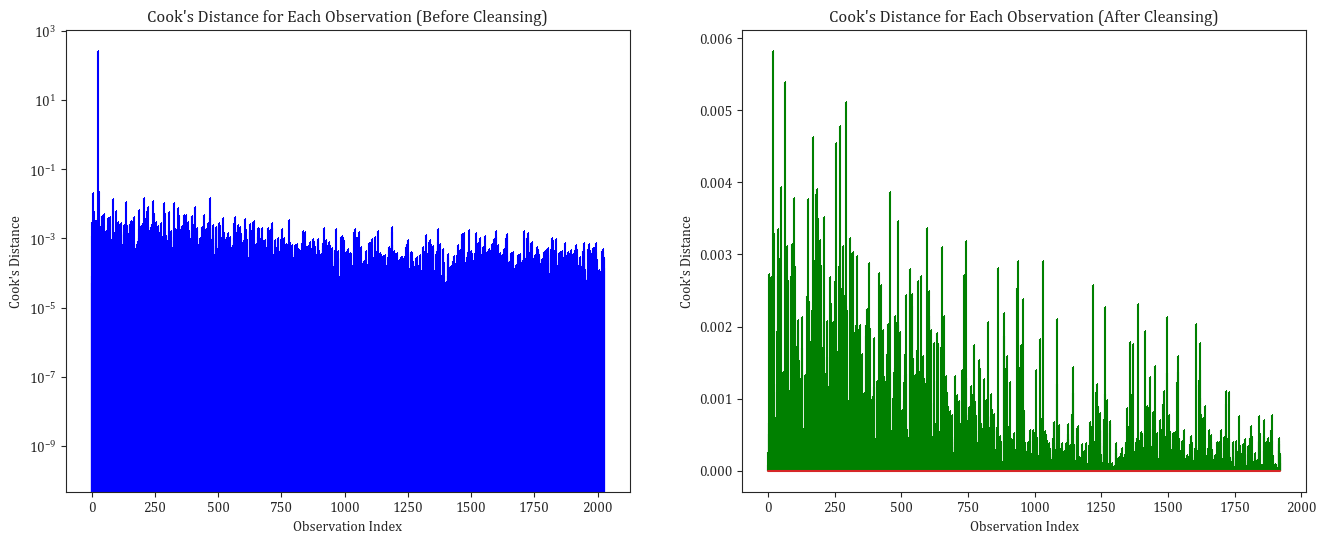

In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Add a constant to the predictor variables
Xsm = sm.add_constant(X_values)

# Fit the OLS model
dirty_model = sm.OLS(y_values, Xsm).fit()

# Calculate Cook's distance
influence = dirty_model.get_influence()
cooks_d = influence.cooks_distance[0]

# Determine the threshold for influential points
threshold = 4 / len(y_values)
influential_points = np.where(cooks_d > threshold)[0]

# Remove influential points from the dataset
X_values = X_values.drop(index=influential_points)
y_values = y_values.drop(index=influential_points)

# Re-fit the OLS model after cleansing
model = sm.OLS(y_values, sm.add_constant(X_values)).fit()

# Calculate Cook's distance after cleansing
influence_cleaned = model.get_influence()
cooks_d_cleaned = influence_cleaned.cooks_distance[0]

# Plot Cook's distance before and after cleansing in separate subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot Cook's distance before cleansing
ax[0].stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", linefmt='b-')
ax[0].set_yscale('log')
ax[0].set_title("Cook's Distance for Each Observation (Before Cleansing)")
ax[0].set_xlabel("Observation Index")
ax[0].set_ylabel("Cook's Distance")

# Plot Cook's distance after cleansing
ax[1].stem(np.arange(len(cooks_d_cleaned)), cooks_d_cleaned, markerfmt=",", linefmt='g-')
ax[1].set_title("Cook's Distance for Each Observation (After Cleansing)")
ax[1].set_xlabel("Observation Index")
ax[1].set_ylabel("Cook's Distance")


plt.show()



### Interpretation

Die dargestellten Grafiken zeigen "Cook's Distance" vor und nach der Datenbereinigung, ein statistisches Maß, das verwendet wird, um den Einfluss einzelner Beobachtungen auf die geschätzten Parameter eines Regressionsmodells zu bewerten.

**Vor der Bereinigung**
Die Grafik vor der Bereinigung zeigt eine signifikante Anzahl von Beobachtungen mit auffallend hohen Cook's Distance-Werten. Diese hohen Werte, besonders deutlich durch Notwendigkeit der Log-Skalierung erkennbar, deuten darauf hin, dass bestimmte Beobachtungen einen überproportional großen Einfluss auf die Modellparameter hatten. Solche Ausreißer können die Regressionsergebnisse verzerren.

**Nach der Bereinigung**
Nach der Bereinigung der Daten zeigt die Grafik eine deutliche Reduktion in der Höhe und der Anzahl der Cook's Distance-Werte. Die Cook's Distance-Werte sind niedriger und gleichmäßiger verteilt, was darauf hindeutet, dass die Ausreißer, die das Modell am stärksten beeinflussten, effektiv entfernt wurden. Diese Veränderung ist kritisch, um sicherzustellen, dass das Regressionsmodell eine realistischere Darstellung der Daten liefert und weniger durch extreme oder untypische Beobachtungen beeinflusst wird.


Diese grafische Darstellung und die daraus folgende Datenbereinigung sind somit essenzielle Schritte, um die Qualität des statistischen Modells zu erhöhen und sicherzustellen, dass die Ergebnisse der Analyse so präzise und zuverlässig wie möglich sind.

In [53]:
import seaborn as sns

# Set Assignment 1 seaborn style
sns.set_style("ticks", {'axes.grid': False})
plt.rcParams['font.family'] = 'Cambria'

## Plot der P Values / Feature Selection

Anbei ein kurzer Plot der P-Werte des Modells nach Ausreißerbereinigung. Diese Werte werden auch für die Erstellung der schrittweisen Regressionsanalyse eine Rolle spielen.

<Axes: >

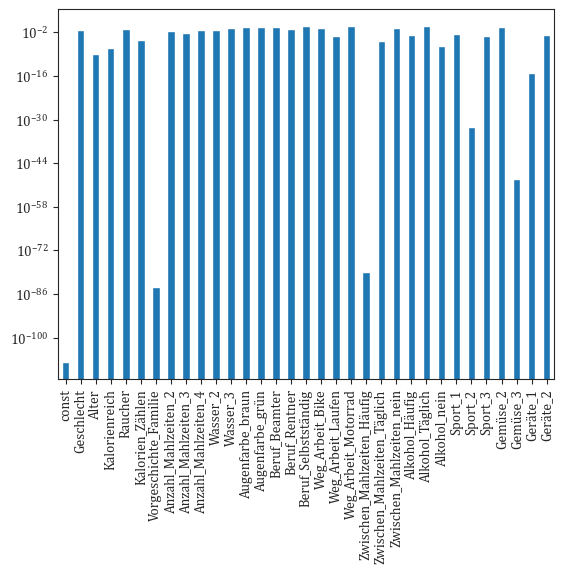

In [54]:
model.pvalues.plot(kind='bar', logy=True)

In [55]:
# Select columns based on p values

p_values = model.pvalues.sort_values(ascending=True)
columns_by_p_values = p_values.index.to_list()
c_i = columns_by_p_values.index('const')
columns_by_p_values.remove('const') # kann nicht verarbeitet werden
p_value_list = model.pvalues.values
p_value_list = np.sort(np.delete(p_value_list, c_i)).tolist()

p_value_list_filtered = [v for v in p_value_list if v <= 0.01]
selected_columns_by_p_values = columns_by_p_values[:len(p_value_list_filtered)]

## Linearitätsprüfung

### Begründung des Vorgehens

Die Durchführung einer Linearitätsprüfung durch visuelle Inspektion mittels Regressionsplots ist fundamental, um sicherzustellen, dass die Beziehung zwischen den Variablen adäquat durch lineare Modelle abgebildet wird. Diese Methode bietet eine intuitive und direkte Möglichkeit, die Angemessenheit der linearen Modellannahme zu bewerten:

- **Identifikation von Mustern**": Regressionsplots ermöglichen es, Muster, Trends und Anomalien schnell zu erkennen, die in numerischen Daten allein möglicherweise nicht offensichtlich sind.
- **Überprüfung auf lineare Beziehungen**: Sie helfen zu bestätigen, dass die Beziehung zwischen den Variablen linear ist, was eine Grundvoraussetzung für die meisten Standard-Regressionstechniken ist.
- **Erkennung von Ausreißern und Hebelwirkungen**: Diese Grafiken sind besonders nützlich, um Datenpunkte zu identifizieren, die ungewöhnlich große Auswirkungen auf die Regressionsgleichung haben könnten.

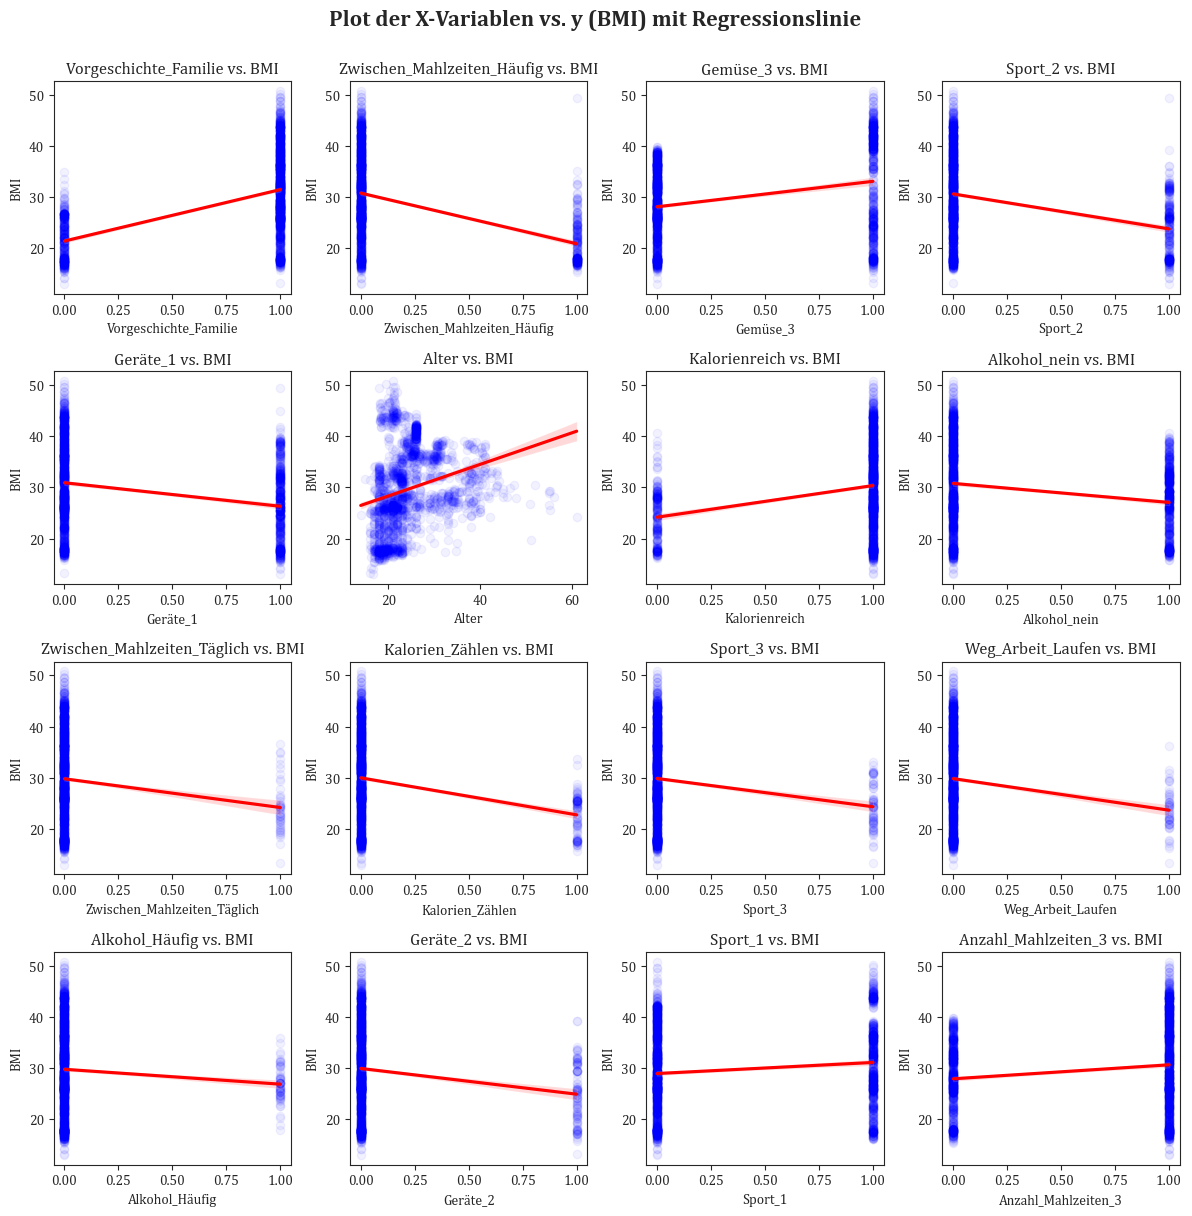

In [56]:
# Create a 3x3 grid of subplots
rows_and_columns = int(np.ceil(np.sqrt(len(selected_columns_by_p_values))))
fig, axes = plt.subplots(rows_and_columns, rows_and_columns, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Columns to plot against BMI
selected_columns = selected_columns_by_p_values + ["BMI"]

# Iterate over the selected columns
for i, col in enumerate(selected_columns_by_p_values):
    if i < len(axes):
        sns.regplot(x=numeric_dataframe[col], y=numeric_dataframe["BMI"], ax=axes[i], color='blue', scatter_kws={'alpha': 0.05}, line_kws={'color': 'red'})
        axes[i].set_title(f'{col} vs. BMI')
    else:
        break 

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set overall title and display the plot
plt.suptitle('Plot der X-Variablen vs. y (BMI) mit Regressionslinie', fontsize=16, fontweight='bold', y=1.01)

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top to make space for the suptitle
plt.show()


### Intepretation 

Die bereitgestellten Regressionsplots sind ein essenzielles Instrument zur Überprüfung der Linearitätsannahme in Regressionsmodellen. Jede Grafik zeigt die Beziehung einer unabhängigen Variablen mit dem BMI und wird durch eine lineare Regressionslinie ergänzt. Die Streuung der Datenpunkte um diese Linie und ihre Verteilung geben Aufschluss über die Art der Beziehung zwischen den Variablen.

- **Konsistenz der Linearen Beziehung**: Die roten Linien in den Grafiken repräsentieren die beste lineare Anpassung an die Daten. In den meisten Fällen folgen die Daten dieser Linie recht konsistent, was auf eine gültige lineare Beziehung hinweist.
- **Abweichungen und Ausreißer**: Einige Plots zeigen deutliche Abweichungen von der linearen Linie oder eine Gruppierung von Ausreißern, besonders in den Kategorien wie "Sport 2" oder "Alkohol_nein". Diese könnten auf potenzielle Nichtlinearitäten oder andere Einflüsse hinweisen, die möglicherweise eine Transformation der Variablen oder eine alternative Modellierungsstrategie erfordern.

Die Analyse der Regressionsplots bestätigt größtenteils die Eignung linearer Modelle für die Daten, zeigt jedoch auch einige Bereiche auf, in denen Anpassungen oder alternative Ansätze erwogen werden sollten. Dies unterstreicht die Notwendigkeit, die Modellannahmen kontinuierlich zu überprüfen und die Modelle entsprechend den spezifischen Eigenschaften der Daten anzupassen. Solche Prüfungen sind entscheidend, um die Zuverlässigkeit und Genauigkeit der aus den Modellen gezogenen Schlussfolgerungen zu gewährleisten.

Nach der Überprüfung der Linearitätsannahmen werden wir nun mit der Anwendung eines angepassten "Custom Sequential Feature Selector" fortfahren, da der Standard SequentialFeatureSelector bezüglich der P-Werte nicht den Erwartungen entspricht. Dieser angepasste Ansatz wird es uns ermöglichen, die Variablen zu identifizieren, die das adjustierte R² unseres Modells optimieren, und sicherstellen, dass unser Modell präzise und robust bleibt.

# Schrittweise Regressionsanalyse

DIe Nutzung der schrittweisen Regressionsanalyse Prozess führt zu einem Modell, das eine Balance zwischen Komplexität und Performance bietet, indem es unnötige Prädiktoren entfernt, die die Modellgenauigkeit und Interpretierbarkeit beeinträchtigen könnten. Durch die Anwendung des angepassten R², visualisiert in einem uns vertrauten Layout, können wir die Verbesserung der Modellgüte nach jedem Schritt visualisieren und quantifizieren.

Wir haben eine Kombination aus den Codebeispielen in 'Regression.ipynb' aus der Vorlesung sowie einer eigenen Featureselection nach P-Werten verwendet, zusammen mit einem Diagramm für das angepasste R², welches das Layout unserer Diagramme aus Aufgabe 1 verwendet.

Der folgende Code führt eine sequentielle Feature-Selektion durch, basierend auf p-Werten. Er trainiert ein lineares Regressionsmodell mit zunehmender Anzahl an Features und bewertet die Modellleistung mittels R² und angepasstem R². Die besten Features werden basierend auf dem höchsten angepassten R² ausgewählt. Die Ergebnisse werden visualisiert, um die Anzahl der Features gegen R², angepasstes R² und p-Werte zu vergleichen.

Best Subset of Features: ['Vorgeschichte_Familie', 'Zwischen_Mahlzeiten_Häufig', 'Gemüse_3', 'Sport_2', 'Geräte_1', 'Alter', 'Kalorienreich', 'Alkohol_nein', 'Zwischen_Mahlzeiten_Täglich', 'Kalorien_Zählen', 'Sport_3', 'Weg_Arbeit_Laufen', 'Alkohol_Häufig', 'Geräte_2', 'Sport_1', 'Anzahl_Mahlzeiten_3', 'Anzahl_Mahlzeiten_2', 'Geschlecht', 'Wasser_2', 'Anzahl_Mahlzeiten_4', 'Raucher', 'Beruf_Rentner', 'Zwischen_Mahlzeiten_nein', 'Weg_Arbeit_Bike', 'Wasser_3']
Best Adjusted R²: 0.6342064077543805
32 32


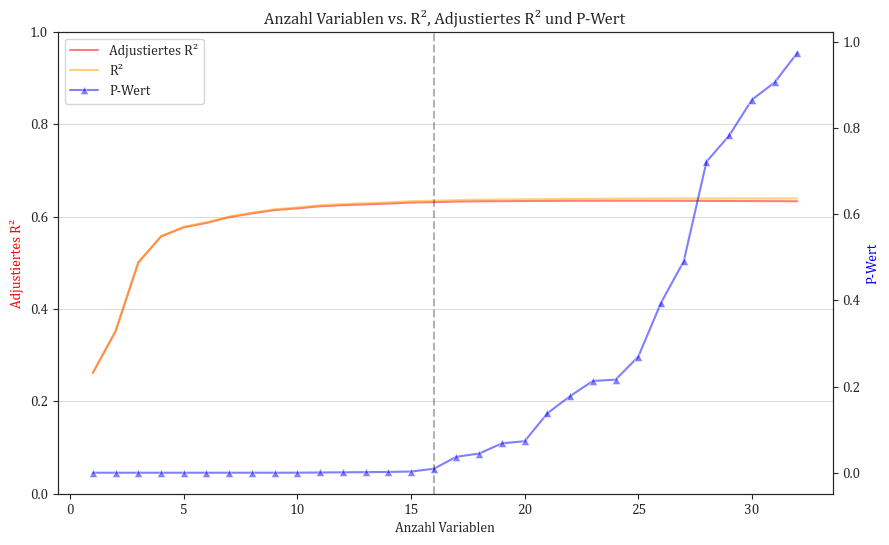

In [57]:
# Import libaries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


lm = LinearRegression()

best_adj_r2, best_subset  = -np.inf, None
num_features_list, r2_list, adj_r2_list = [], [], []

for nf in range(1, len(columns_by_p_values)+1):

    # Custom selection based on first model
    selected_features = columns_by_p_values[:nf]
    selected_X = X_values[selected_features]
    
    # Fit the model with the selected features
    
    lm.fit(selected_X, y_values)
    
    # Calculate R² and adjusted R²
    r2 = lm.score(selected_X, y_values)
    n = len(y_values)
    p = nf
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    # Update the best adjusted R² and best subset if necessary
    if adj_r2 > best_adj_r2:
        best_adj_r2 = adj_r2
        best_subset = selected_features
    
    # Append the number of features and adjusted R² to the lists
    # print(f"Number of Features: {nf},R²: {r2} Adjusted R²: {adj_r2}")
    # print("Subset: ", selected_features,"\n")
    num_features_list.append(nf)
    adj_r2_list.append(adj_r2)
    r2_list.append(r2)

print("Best Subset of Features:", best_subset)
print("Best Adjusted R²:", best_adj_r2)

print(len(num_features_list), len(p_value_list))

# Plot the number of features vs. adjusted R²
plt.figure(figsize=(10, 6))

# Create the first y-axis for adj_r2_list
ax1 = plt.gca()
sns.lineplot(x=num_features_list, y=adj_r2_list, color='red', alpha=0.5, ax=ax1, label='Adjustiertes R²')
sns.lineplot(x=num_features_list, y=r2_list, color='orange', alpha=0.5, ax=ax1, label='R²')
ax1.set_xlabel('Anzahl Variablen')
ax1.set_ylabel('Adjustiertes R²', color='red')
ax1.grid(axis='y', linestyle='-', linewidth=0.5, color='black', alpha=0.2)
# ax1.set_xticks([f"{i}: [+{columns_by_p_values[i-1]}]" for i in range(1, 20)])
# ax1.set_xticklabels([f"{i}: [+{columns_by_p_values[i-1]}]" for i in range(1, 20)])

ax1.set_ylim(0,1)
ax2 = ax1.twinx()
sns.lineplot(x=num_features_list, y=p_value_list, marker="^", color='blue', alpha=0.5, ax=ax2, label='P-Wert')
ax2.set_ylabel('P-Wert', color='blue')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.get_legend().remove()
ax1.get_legend().remove()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.axvline(x=len(selected_columns_by_p_values), color='black', linestyle='--', alpha=0.3)
plt.title('Anzahl Variablen vs. R², Adjustiertes R² und P-Wert')
plt.show()


### Intepretation

- **R² (Blau)**: Diese Linie zeigt eine kontinuierliche Zunahme mit der Anzahl der Variablen. Das R² misst die Varianzerklärung des Modells und steigt tendenziell, wenn mehr Variablen hinzugefügt werden.

- **Adjustiertes R² (Orange)**: Diese Linie steigt zunächst an, stabilisiert sich jedoch etwa bei 15 Variablen und verbleibt dann relativ konstant. Das adjustierte R² berücksichtigt die Anzahl der Variablen im Modell und passt das R² entsprechend an, um eine Überanpassung zu vermeiden.

- **P-Wert (Schwarze Punkte)**: Der P-Wert bleibt zunächst fast unverändert und beginnt dann nach etwa 15 Variablen signifikant zu steigen, was darauf hindeutet, dass zusätzliche Variablen ab diesem Punkt möglicherweise nicht signifikant zur Erklärung des BMI beitragen.

Das Diagramm zeigt deutlich, dass Features mit einem P-Wert über 0.01 als nichtig betrachtet werden können und daher aus dem Modell entfernt werden sollten. Diese Einsicht hilft, die Modellgenauigkeit zu verbessern, indem irrelevante Variablen eliminiert werden, die keinen signifikanten Beitrag zur Erklärung der Zielvariable leisten.

### Begründung des Vorgehens 

Das verbesserte Modell mit einem R² von 0.621, das gegenüber dem vorherigen Modell mit einem R² von 0.568 eine deutliche Steigerung zeigt, ist das Ergebnis einer sorgfältigen Feature-Auswahl und Datenbereinigung. Die Anwendung des "Custom Sequential Feature Selector", die Nutzung von VIF zur Identifikation und Entfernung von Multikollinearität sowie die Säuberung der Daten mittels Cook's Distance haben dazu beigetragen, ein effizienteres und präziseres Modell zu entwickeln. Die Reduzierung der Variablenanzahl durch diese Methoden führte zu einer signifikanten Verbesserung des adjustierten R², was auf eine stärkere und relevantere Beziehung der verbliebenen Prädiktoren mit der Zielvariable BMI hindeutet.

# Aufstellung des 1. Modells

In [58]:
X_values = X_values[selected_columns_by_p_values] 
# display(X_values.head())# sieht schon übersichtlicher aus

Xsm = sm.add_constant(X_values)
# Fit the OLS model
new_model = sm.OLS(y_values, Xsm).fit()
# Get predictions
predictions = new_model.predict(Xsm) 
# Print model summary
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     206.5
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:47:41   Log-Likelihood:                -5751.1
No. Observations:                1922   AIC:                         1.154e+04
Df Residuals:                    1905   BIC:                         1.163e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Kritische Betrachtung der KPIs
**R² und Adjustiertes R²**
Das R² von 0.634 und das angepasste R² von 0.631 sind moderat und deuten darauf hin, dass das Modell etwa 63.1% der Varianz der abhängigen Variable (BMI) erklärt. Es gibt also Raum für Verbesserungen.

**F-Statistik und p-Wert**
Eine F-Statistik von 206.5 und ein p-Wert von 0.00 zeigen, dass das Modell insgesamt signifikant ist.

**AIC und BIC**
Die AIC (1.154e+04) und BIC (1.163e+04) sind hilfreich für den Modellvergleich, aber alleine schwer zu interpretieren. Sie sollten für die Auswahl des besten Modells unter mehreren Alternativen genutzt werden.

**Standardfehler und t-Werte:**
Alle Koeffizienten sind signifikant (p-Wert < 0.05), was darauf hinweist, dass sie einen statistisch signifikanten Einfluss auf den BMI haben.

**Durbin-Watson-Statistik**
Der Wert von 1.024 deutet auf eine positive Autokorrelation der Residuen hin, was die Modellannahmen verletzt.

**Omnibus- und Jarque-Bera-Tests**

Beide Tests weisen auf eine Abweichung von der Normalverteilung der Residuen hin (p-Wert < 0.05), was problematisch für die Validität der Ergebnisse ist.


Mögliche Verbesserungen:
- Residuenanalyse: Weitere Untersuchung und Korrektur der Autokorrelation und Nicht-Normalität der Residuen

## Das 1. Modell als Formel
$$
\begin{aligned}
\text{BMI} = \\
&  19.4104 \\
& + 7.2013 \cdot \text{Vorgeschichte\_Familie} \\
& - 7.9666 \cdot \text{Zwischen\_Mahlzeiten\_Häufig} \\
& + 6.2349 \cdot \text{Gemüse\_3} \\
& - 4.4119 \cdot \text{Sport\_2} \\
& - 2.1278 \cdot \text{Geräte\_1} \\
& + 0.1299 \cdot \text{Alter} \\
& + 2.0828 \cdot \text{Kalorienreich} \\
& - 1.4018 \cdot \text{Alkohol\_nein} \\
& - 3.8515 \cdot \text{Zwischen\_Mahlzeiten\_Täglich} \\
& - 2.3936 \cdot \text{Kalorien\_Zählen} \\
& - 2.3497 \cdot \text{Sport\_3} \\
& - 2.7227 \cdot \text{Weg\_Arbeit\_Laufen} \\
& - 1.9856 \cdot \text{Alkohol\_Häufig} \\
& - 1.7607 \cdot \text{Geräte\_2} \\
& + 0.8730 \cdot \text{Sport\_1} \\
& + 0.5937 \cdot \text{Anzahl\_Mahlzeiten\_3}
\end{aligned}
$$

*EDIT: Da fast alle verbleibenden Variablen binär (1 oder 0) sind, ist die "Regressionsformel" prinzipiell nur eine Art Addition und Subtraktion verschiedener Werte des Modells.*



### Intepretation

Die Analyse der Koeffizienten des neuen Modells offenbart, welche Faktoren einen signifikanten Einfluss auf den BMI haben, sowohl positiv als auch negativ.

Faktoren mit positivem Einfluß auf BMI:

- **Vorgeschichte_Familie** und **Gemüse_3** zeigen, dass sowohl genetische als auch Ernährungsgewohnheiten stark zum BMI beitragen können. Insbesondere die Rolle von Gemüse könnte darauf hinweisen, dass Personen mit höherem BMI möglicherweise verstärkt versuchen, durch gesündere Ernährung ihr Gewicht zu beeinflussen.
- **Kalorienreiches Essen** und **Alter** unterstützen die intuitive Annahme, dass sowohl der Konsum kalorienreicher Nahrung als auch altersbedingte Stoffwechselveränderungen zu einem höheren BMI führen.

Faktoren mit negativem Einfluß auf BMI:

- **Häufige Zwischenmahlzeiten**, **Sport**, **geringe Nutzung von Geräten** und **aktiver Arbeitsweg** zeigen, dass ein aktiver Lebensstil und bewusste Ernährungsgewohnheiten effektiv den BMI senken können.
- **Alkoholverzicht** und **Kalorienzählen** sind weitere Indikatoren für ein gesundheitsbewusstes Verhalten, das mit einem niedrigeren BMI korreliert.


Trotz der Verbesserungen durch die Feature-Auswahl bleibt das R² unterhalb der 0,7-Marke, was möglicherweise auf nicht erfasste Variablen oder nichtlineare Zusammenhänge hindeutet, die durch das aktuelle lineare Modell nicht adäquat abgebildet werden.
Die Tatsache, dass die AIC/BIC-Werte noch immer relativ hoch sind, deutet darauf hin, dass das Modell trotz der Verbesserungen möglicherweise immer noch nicht die optimale Komplexität erreicht hat oder dass weitere Variablen oder Interaktionseffekte zu berücksichtigen sind.


Das neue Modell zeigt deutlich, wie durch eine gezielte Feature-Auswahl und Datenbereinigung nicht nur die Modellleistung verbessert, sondern auch tiefere Einblicke in die Beziehungen zwischen den Variablen und dem BMI gewonnen werden können. Die Analyse bietet eine robuste Grundlage für weitere Untersuchungen und Modellanpassungen, um die Vorhersagegenauigkeit weiter zu erhöhen und ein umfassenderes Verständnis der Einflussfaktoren auf den BMI zu entwickeln.

## Normalverteilung der Residuen

### Begründung des Vorgehens
Die Überprüfung der Normalverteilung der Residuen ist essenziell, da viele statistische Tests und Modelle auf dieser Annahme basieren. Eine Normalverteilung der Residuen gewährleistet, dass die Schätzungen und Konfidenzintervalle des Modells zuverlässig sind. Um dies zu überprüfen, nutzen wir das Q-Q-Diagramm, das uns hilft, visuell zu überprüfen, ob die Residuen normalverteilt sind, und potenzielle Abweichungen zu identifizieren.

Das Histogramm der tatsächlichen Y-Werte ist ein weiteres Werkzeug, das uns die Verteilung der abhängigen Variable aufzeigt und uns dabei hilft zu sehen, ob sie den Modellannahmen entspricht. Eine symmetrische Verteilung der tatsächlichen Y-Werte unterstützt die Annahme der Normalverteilung der Residuen.

Im Q-Q-Plot sollten die Punkte idealerweise auf einer geraden Linie liegen, wenn die Residuen normalverteilt sind. Abweichungen von dieser Linie können auf eine Abweichung von der Normalverteilung hinweisen.

 ### Visualisierung der Residuen
Um die Normalverteilung der Residuen zu überprüfen, haben wir zwei grafische Methoden verwendet:

Histogramm der tatsächlichen Y-Werte: Dieses Histogramm zeigt die Verteilung der Y-Werte, die das Modell vorhersagt. Eine symmetrische Verteilung unterstützt die Annahme der Normalverteilung der Residuen.

Q-Q-Plot der Residuen: Dieser Plot vergleicht die quantilen der Residuen mit den quantilen einer theoretischen Normalverteilung. Wenn die Residuen normalverteilt sind, sollten die Punkte auf einer geraden Linie liegen.

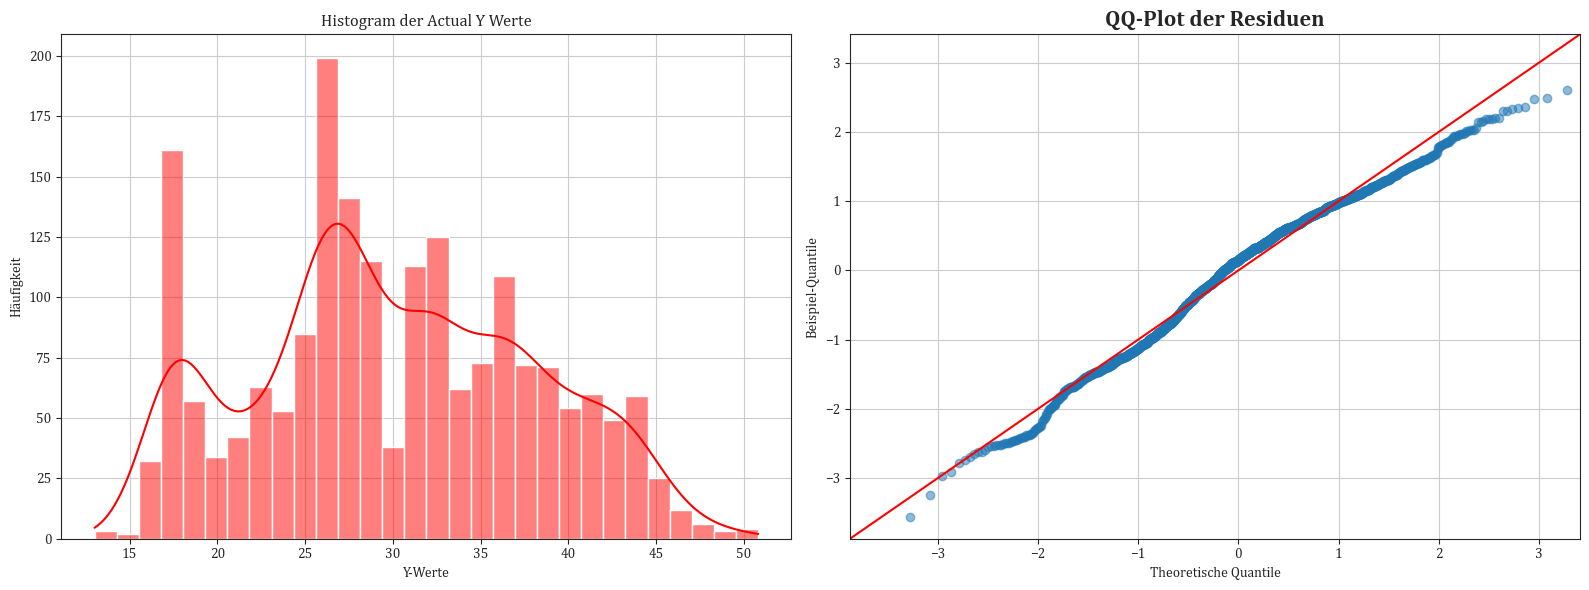

In [59]:
residuals = new_model.resid

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of residuals
sns.histplot(y_values, bins=30, kde=True, color='red', ax=ax[0])
# sns.histplot(residuals, bins=30, kde=True, color='red', ax=ax[0])
# ax[0].set_title('Histogramm der Residuen', fontsize=16, fontweight='bold')
# ax[0].set_xlabel('Residuals')
ax[0].set_title('Histogram der Actual Y Werte')
ax[0].set_xlabel('Y-Werte')
ax[0].set_ylabel('Häufigkeit')
ax[0].grid(True)


# QQ plot of residuals
sm.qqplot(residuals, line='45', alpha=0.5,fit=True, ax=ax[1])
ax[1].set_title('QQ-Plot der Residuen', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Theoretische Quantile')
ax[1].set_ylabel('Beispiel-Quantile')
ax[1].grid(True)

plt.tight_layout()
plt.show()


### Interpretation

Der Q-Q-Plot zeigt, wie erwartet, dass die Residuen des Modells weitgehend entlang der Diagonalen liegen, was auf eine annähernd normale Verteilung hinweist. Es gibt jedoch einige Abweichungen an den Enden, die auf leichte Abweichungen von der Normalverteilung hinweisen könnten. Diese Abweichungen sind jedoch nicht signifikant genug, um die Annahme der Normalverteilung ernsthaft in Frage zu stellen.

Das Histogramm der tatsächlichen Y-Werte zeigt die Verteilung der beobachteten Werte. Ein symmetrisches Histogramm mit einer glockenförmigen Kurve deutet auf eine normalverteilte Variable hin. In unserem Fall zeigt das Histogramm, dass die tatsächlichen Y-Werte einigermaßen symmetrisch verteilt sind, was die Annahme der Normalverteilung weiter unterstützt.

## Homoskedastische Fehler von ε
### Plot der Residuen

### Begründung des Vorgehens

Nach der Überprüfung der Normalverteilung der Residuen ist es wichtig, die Homoskedastizität der Fehler zu überprüfen. Homoskedastizität bedeutet, dass die Varianz der Fehler konstant bleibt und nicht von den vorhergesagten Werten abhängt. Dies ist eine wichtige Annahme für lineare Modelle, da Heteroskedastizität (nicht konstante Varianz) die Effizienz und Validität der Schätzungen beeinträchtigen kann.

### Plot der Residuen

Um die Homoskedastizität zu überprüfen, erstellen wir einen Plot der Residuen gegen die vorhergesagten Werte. In einem solchen Plot sollte ein gleichmäßiges Verteilungsmuster der Residuen um die horizontale Achse zu sehen sein. Ein solches Muster würde auf Homoskedastizität hinweisen. Andererseits, wenn ein Muster oder eine Struktur in der Verteilung der Residuen sichtbar ist, deutet dies auf Heteroskedastizität hin.

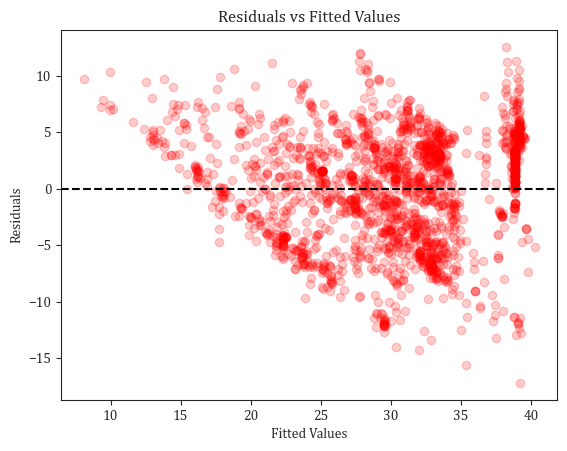

In [60]:
# Get the residuals and fitted values
residuals = new_model.resid
fitted = new_model.fittedvalues

# Plot residuals vs fitted values
plt.scatter(fitted, residuals, alpha=0.2,color='r')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# the result of this plot here sucks ass
# It means there is probably no linear relation between our dependent (y) and independet variables (X)

### Interpretation

Der Plot zeigt, dass die Residuen keine konstante Varianz aufweisen. Stattdessen ist eine deutliche Trichterform zu erkennen, die auf Heteroskedastizität hinweist. Diese Trichterform bedeutet, dass die Varianz der Fehlerterme nicht konstant ist, was wiederum bedeutet, dass das Modell möglicherweise nicht alle systematischen Einflüsse der unabhängigen Variablen auf die abhängige Variable erfasst. Das zeigt uns auf, dass unser Modell noch erhebliches Verbesserungspotenzial hat.



Als nächstes erstellen wir einen Vergleichsdatensatz, der die tatsächlichen Y-Werte, die vorhergesagten Werte und die Residuen zusammenfasst. Wir speichern diese Daten in einem DataFrame, um sie strukturiert zu organisieren. Anschließend runden wir die Werte der vorhergesagten Werte und der Residuen auf zwei Dezimalstellen, um die Darstellung zu vereinfachen. Wir kategorisieren die tatsächlichen Y-Werte und die gerundeten vorhergesagten Werte in BMI-Kategorien, indem wir eine entsprechende Funktion anwenden. Dies ermöglicht es uns, Muster und Abweichungen zwischen den tatsächlichen und den vorhergesagten Werten besser zu erkennen. Durch diese Vorgehensweise können wir die Analyse und Interpretation der Modellergebnisse deutlich verbessern.

In [61]:
comparison_df = pd.DataFrame({
    'y_values': y_values,
    'fitted': fitted,
    'residuals': residuals
})
# add category columns and round values
comparison_df['fitted'] = comparison_df['fitted'].round(2)
comparison_df['residuals'] = comparison_df['residuals'].round(2)
comparison_df['bmi_category'] = comparison_df['y_values'].apply(get_bmi_category)
comparison_df['bmi_category_fitted'] = comparison_df['fitted'].apply(get_bmi_category)


## Klassifizierungsmetriken

### Begründung des Vorgehens

In diesem Abschnitt bewerten wir die Leistung unseres Modells durch die Erstellung und Analyse einer Konfusionsmatrix. Diese Methode soll uns dabei helfen, die Genauigkeit und Verteilung der Klassifikationsergebnisse zu verstehen.

Die Bewertung der Modellleistung anhand der Konfusionsmatrix zeigt uns, wie genau und zuverlässig die Klassifikationsergebnisse sind. Die Konfusionsmatrix erklärt, wie gut das Modell in verschiedenen Kategorien ist und wie gut es die einzelnen Kategorien erkennt und klassifiziert. Wenn das Modell Fehlklassifikationen aufweist, kann man diese einfach analysieren und das Modell entsprechend verbessern. Die  bietet eine übersichtliche Darstellung der Ergebnisse und hilft dabei, Verbesserungspotenziale zu erkennen.


Classification Report Model 1:
                       precision    recall  f1-score   support

           Fettleibig       0.29      0.60      0.39       341
        Normalgewicht       0.34      0.42      0.38       247
Sehr_Stark_Fettleibig       0.87      0.76      0.81       384
     Stark_Fettleibig       0.06      0.01      0.02       190
         Untergewicht       0.67      0.31      0.42       231
   Übergewicht_Leicht       0.34      0.20      0.25       312
    Übergewicht_Stark       0.21      0.24      0.22       217

             accuracy                           0.41      1922
            macro avg       0.40      0.36      0.36      1922
         weighted avg       0.43      0.41      0.40      1922



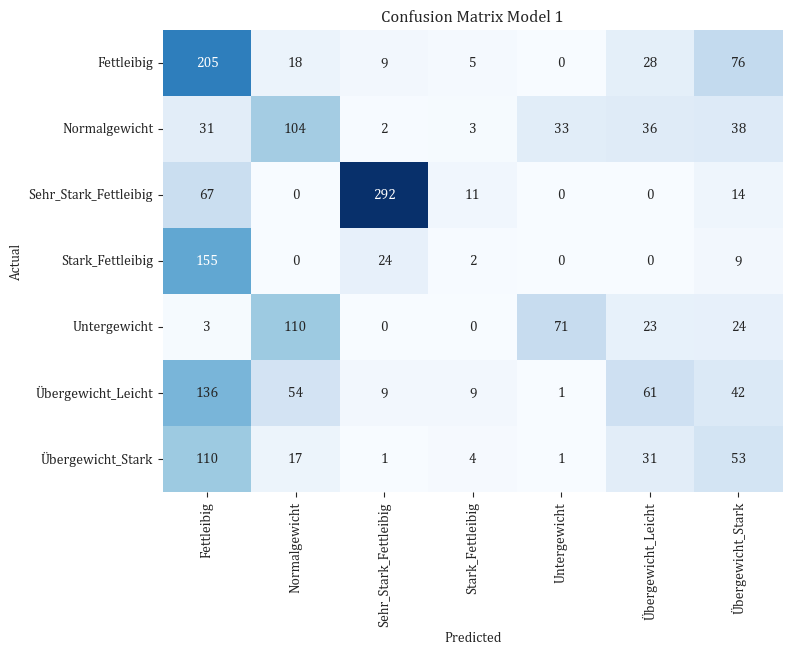

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(comparison_df['bmi_category'], comparison_df['bmi_category_fitted'])

class_report = classification_report(comparison_df['bmi_category'], comparison_df['bmi_category_fitted'])
print("\nClassification Report Model 1:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=sorted(comparison_df['bmi_category'].unique()), 
            yticklabels=sorted(comparison_df['bmi_category'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Model 1')
plt.show()


### Interpretation

Die Konfusionsmatrix zeigt, dass das Modell in der Kategorie "Sehr Stark Fettlebig" eine hohe Übereinstimmung aufweist, was durch die dunkelblaue Einfärbung und die Zahl 291  zu erkennen ist. In den Kategorien "Fettlebig" und "Normalgewicht" gibt es viele Fehlklassifikationen, insbesondere in die angrenzenden Kategorien wie "Übergewicht Stark" und "Übergewicht Leicht". Die Kategorie "Stark Fettlebig" weist erhebliche Fehlklassifikationen auf, besonders in die Kategorie "Fettlebig", was auf Schwierigkeiten des Modells hinweist, diese beiden Kategorien zu differenzieren. Auch die Kategorien "Untergewicht" und "Übergewicht Leicht" zeigen viele Fehlklassifikationen, was darauf hinweist, dass das Modell diese Kategorien nicht gut trennt. 

Die meisten Fehlklassifikationen betreffen benachbarte Kategorien, was darauf hindeutet, dass das Modell Schwierigkeiten hat, klare Grenzen zwischen ähnlichen BMI-Kategorien zu ziehen. Insgesamt deutet die Konfusionsmatrix auf Verbesserungspotenzial des Modells hin, insbesondere in der Trennung von benachbarten Kategorien.

## Log-Skala für Zielvariable und Anpassung der Umrechnungsformel sowie Polynomialfeatures für X-Werte

### Begründung des Vorgehens aus theoretischer Sicht

Um die Modellgüte zu verbessern, transformieren wir die Zielvariable logarithmisch. Dadurch kann die Verteilung der Zielvariable normalisiert werden und der Einfluss von Ausreißern wird reduziert. Anschließend haben wir Polynomialfeatures bis zum Grad 2 für die X-Werte erstellt, um nicht-lineare Beziehungen zwischen den Variablen zu erfassen. Durch die Merkmalsselektion basierend auf p-Werten und die Optimierung der Anzahl der Variablen können wir das Modell vereinfachen und gleichzeitig eine hohe Erklärungskraft beibehalten.

### Begründung des Vorgehens aus praktischer Sicht

Nach allerhand interner Diskussion im Team, teamübergreifend sowie nach viel herumprobieren sind wir auf die o.g. Modifizierung des Modells gekommen. Der `degree=2` erwies sich als Sweetspot, sowohl in Hinsicht auf Rechenzeit als auch auf die Modellperformance.

In [63]:
from sklearn.preprocessing import PolynomialFeatures

y_values_scaled = np.log(poly_data["BMI"])

poly_data.drop(columns="BMI",inplace=True)


polynomial_features = PolynomialFeatures(degree=2)
polynomial_X_values = polynomial_features.fit_transform(poly_data)
polynomial_X_values_C = sm.add_constant(polynomial_X_values)
# ====================================================================
# Apply code cleansing like before
# ====================================================================

# Select features by p value
model = sm.OLS(y_values_scaled, polynomial_X_values_C).fit()

p_values = model.pvalues.sort_values(ascending=True)
columns_by_p_values = p_values.index.to_list()
c_i = columns_by_p_values.index('const')
columns_by_p_values.remove('const') # kann nicht verarbeitet werden
p_value_list = model.pvalues.values
p_value_list = np.sort(np.delete(p_value_list, c_i)).tolist()

p_value_list_filtered = [v for v in p_value_list if v <= 0.01]
selected_columns_by_p_values = columns_by_p_values[:len(p_value_list_filtered)]

lm = LinearRegression()
best_adj_r2, best_subset  = -np.inf, None
num_features_list, r2_list, adj_r2_list = [], [], []


Ein OLS-Modell wurde auf die transformierten Daten angepasst, und die p-Werte der Features wurden analysiert, um die signifikantesten Features zu identifizieren. Dies hilft, das Modell zu vereinfachen und Überanpassung zu vermeiden. Der Code wurde großteils von den Vorbereitungen des 1. Modells recycled.

## Wieso keine ausführliches erneutes Datencleansing?

Einige Schritte wie die Überprüfung oder One-Hot-Codierung können wir aus dem 1. Modell übernehmen. VIF Cleansing ist hier nur schwer möglich da die Anzahl der Variablen (~650) nicht menschenlesbar noch effizient bearbeitbar ist ohne hohen zeitlichen Aufwand. Es wurden mehrere Versuche unternommen um automatisiert die VIF Faktoren zu reinigen jedoch ohne Erfolg (Erfolg = Verbesserung R2).

Auch die Reinigung nach Cook's Distance erwies sich nach verschiedenen Ansätzen (Modifikation Threshold, Logaritmierung, Quadrierung der Cook's Distance) als eher schädlich für das Modell und wurde daher wieder verworfen.

Fragmente davon sind im Anhang enthalten, zu gunsten einer übersichtlicheren Bearbeitung wurde jedoch oft nicht-funktioneller Code direkt überschrieben oder gelöscht.

# Erstellung des 2. Modells
### (mittels Schrittweise Regressionsanalyse)

Best Subset of Features: [69, 239, 88, 550, 71, 2, 536, 151, 297, 505, 303, 544, 36, 56, 454, 64, 619, 122, 526, 134, 4, 41, 549, 547, 235, 535, 218, 403, 133, 223, 340, 346, 65, 351, 43, 537, 504, 214, 551, 34, 629, 221, 212, 365, 285, 271, 503, 532, 422, 431, 277, 216, 534, 594, 27, 196, 61, 341, 217, 342, 26, 60, 243, 156, 450, 593, 590, 501, 543, 587, 585, 411, 345, 125, 93, 94, 401, 100, 415, 349, 283, 73, 62, 74, 428, 387, 538, 546, 51, 556, 138, 397, 413, 42, 50, 443, 245, 241, 166, 185, 456, 259, 465, 224, 7, 371, 480, 562, 329, 358, 597, 474, 84, 207, 482, 274, 163, 97, 439, 370, 112, 199, 222, 398, 238, 459, 17, 407, 533, 449, 198, 408, 219, 300, 160, 457, 143, 282, 615, 30, 357, 328, 152, 424, 327, 44, 444, 40, 402, 548, 278, 599, 210, 55, 251, 225, 453, 79, 240, 427, 344, 253, 67, 539, 22, 563, 622, 286, 302, 484, 108, 575, 25, 499, 244, 473, 229, 393, 334, 293, 442, 423, 203, 46, 139, 157, 181, 464, 463, 155, 367, 289, 350, 72, 416, 437, 561, 348, 491, 148, 617, 605, 531, 

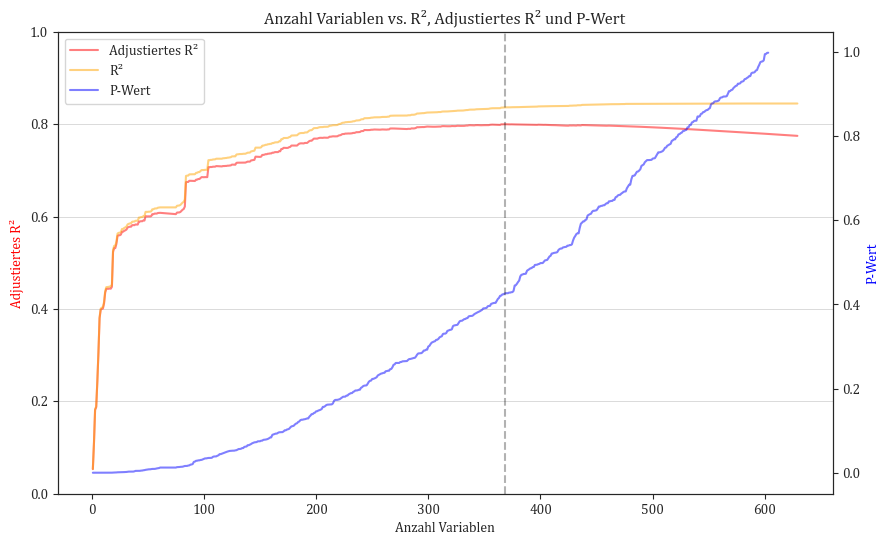

In [64]:
values_df = pd.DataFrame(polynomial_X_values_C)
values_df.head()

for nf in range(1, len(columns_by_p_values)+1):

    # Custom selection based on first model
    selected_features = [int(f[1:]) for f in columns_by_p_values[:nf]]
    selected_X = values_df[selected_features]
    
    # Fit the model with the selected features
    
    lm.fit(selected_X, y_values_scaled)
    
    # Calculate R² and adjusted R²
    r2 = lm.score(selected_X, y_values_scaled)
    n = len(y_values_scaled)
    p = nf
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    # Update the best adjusted R² and best subset if necessary
    if adj_r2 > best_adj_r2:
        best_adj_r2 = adj_r2
        best_subset = selected_features
    
    # Append the number of features and adjusted R² to the lists
    # print(f"Number of Features: {nf},R²: {r2} Adjusted R²: {adj_r2}")
    # print("Subset: ", selected_features,"\n")
    num_features_list.append(nf)
    adj_r2_list.append(adj_r2)
    r2_list.append(r2)

print("Best Subset of Features:", best_subset)
print("Best Adjusted R²:", best_adj_r2)

print(len(num_features_list), len(p_value_list))

# Plot the number of features vs. adjusted R²
plt.figure(figsize=(10, 6))

# Create the first y-axis for adj_r2_list
ax1 = plt.gca()
sns.lineplot(x=num_features_list, y=adj_r2_list, color='red', alpha=0.5, ax=ax1, label='Adjustiertes R²')
sns.lineplot(x=num_features_list, y=r2_list, color='orange', alpha=0.5, ax=ax1, label='R²')
ax1.set_xlabel('Anzahl Variablen')
ax1.set_ylabel('Adjustiertes R²', color='red')
ax1.grid(axis='y', linestyle='-', linewidth=0.5, color='black', alpha=0.2)
# ax1.set_xticks([f"{i}: [+{columns_by_p_values[i-1]}]" for i in range(1, 20)])
# ax1.set_xticklabels([f"{i}: [+{columns_by_p_values[i-1]}]" for i in range(1, 20)])

ax1.set_ylim(0,1)
ax2 = ax1.twinx()
sns.lineplot(x=num_features_list, y=p_value_list, color='blue', alpha=0.5, ax=ax2, label='P-Wert')
ax2.set_ylabel('P-Wert', color='blue')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.get_legend().remove()
ax1.get_legend().remove()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.axvline(x=adj_r2_list.index(best_adj_r2), color='black', linestyle='--', alpha=0.3)
plt.title('Anzahl Variablen vs. R², Adjustiertes R² und P-Wert')
plt.show()

# ====================================================================
# ====================================================================
# Build the final model
polynomial_X_values_C = values_df[best_subset]
polynomial_X_values_C = sm.add_constant(polynomial_X_values_C)
final_polynomial_model = sm.OLS(y_values_scaled, polynomial_X_values_C).fit()
predictions = final_polynomial_model.predict(polynomial_X_values_C) 

### Interpretation
Die Grafik illustriert den Zusammenhang zwischen der Anzahl der Variablen und den Leistungsmetriken des Modells: R², adjustiertes R² und P-Wert.

Anzahl der Variablen vs. R² und Adjustiertes R²:

**R² (orange Linie):**  Das R² steigt zunächst rasch an, was bedeutet, dass zusätzliche Variablen zu einer besseren Erklärung der Zielvariablen beitragen. Ab einem gewissen Punkt flacht die Kurve jedoch ab, was darauf hinweist, dass weitere Variablen kaum noch zur Modellgüte beitragen. Dies zeigt, dass ab einer Anzahl von ungefähr 45 Variablen keine signifikante Verbesserung mehr erzielt wird.
**Adjustiertes R² (rote Linie):** Das adjustierte R² berücksichtigt die Anzahl der Variablen und verhindert somit Überanpassung. Es zeigt ein ähnliches Muster wie das R², erreicht jedoch früher ein Plateau und beginnt danach leicht zu sinken, was darauf hinweist, dass zusätzliche Variablen die Modellgüte nicht weiter verbessern und sogar verschlechtern können.
Anzahl der Variablen vs. P-Wert:

**P-Wert (blaue Linie):**  Der P-Wert steigt mit der Anzahl der Variablen stetig an. Dies deutet darauf hin, dass zusätzliche Variablen weniger signifikant sind und das Modell möglicherweise überanpasst wird, was die statistische Signifikanz der einzelnen Prädiktoren verringert.


In [65]:
# Print model summary
print(final_polynomial_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     28.15
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:49:09   Log-Likelihood:                 1513.0
No. Observations:                2026   AIC:                            -2402.
Df Residuals:                    1714   BIC:                            -650.5
Df Model:                         311                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5205      0.108     23.399      0.0

R-squared: Der R-squared-Wert beträgt 0.836, was bedeutet, dass etwa 83.6% der Variation im BMI durch die unabhängigen Variablen im Modell erklärt werden können. Dies deutet darauf hin, dass das Modell eine gute Passform aufweist und einen Großteil der Variation im BMI erklären kann.

Adjusted R-squared: Der bereinigte R-squared-Wert liegt bei 0.807, was nahe am R-squared-Wert liegt. Dies bedeutet, dass die Hinzufügung weiterer Variablen zur Regression das Modell nicht signifikant verbessert. Der Adjusted R-squared-Wert berücksichtigt die Anzahl der Variablen im Modell und ist daher ein besserer Indikator für die Modellqualität.

F-statistic (F-Test Statistik): Der F-Statistik-Wert beträgt 28.15, was darauf hinweist, dass das Modell insgesamt statistisch signifikant ist. Dies bedeutet, dass zumindest eine der unabhängigen Variablen einen signifikanten Einfluss auf den BMI hat.

AIC (Akaike Information Criterion): Der AIC-Wert liegt bei -2402, was ein Maß für die Modellgüte ist. Ein niedrigerer AIC-Wert deutet auf ein besseres Modell hin, aber AIC-Werte sind nur für den Vergleich von Modellen relevant, nicht für die absolute Bewertung.

BIC (Bayesian Information Criterion): Der BIC-Wert beträgt -650.5, auch bekannt als Schwarz's Bayesian Criterion (SBC), ist ein weiteres Maß für die Modellgüte. Wie der AIC-Wert ist ein niedrigerer BIC-Wert besser, aber auch hier ist nur der Vergleich mit anderen Modellen relevant.

### Kritische Punkte

Overfitting:
Mit 311 unabhängigen Variablen könnte das Modell anfällig für Overfitting sein, insbesondere wenn die Anzahl der Beobachtungen (2026) im Vergleich zur Anzahl der Variablen relativ gering ist. Dies könnte dazu führen, dass das Modell gut auf die Trainingsdaten passt, aber schlecht auf neuen Daten generalisiert.

Multikollinearität:
Bei einer großen Anzahl von Variablen besteht die Gefahr von Multikollinearität, d.h. einige Variablen könnten stark miteinander korreliert sein. Dies kann die Stabilität der Koeffizientenschätzer beeinträchtigen und die Interpretation der Ergebnisse erschweren.

### Weiterer Offensichtlicher Nachteil
Trotz der besseren Modellperformance hat das Modell weitaus zu viele Variablen um es für Menschen verständlich interpretieren zu können.

## Homoskedastische Fehler
### Plot der Residuen des verbesserten Models

### Begründung des Vorgehens

Um zu Überprüfen ob unser Modell besser wurde überprüfen wir erneut die Homoskedastizität der Residuen.

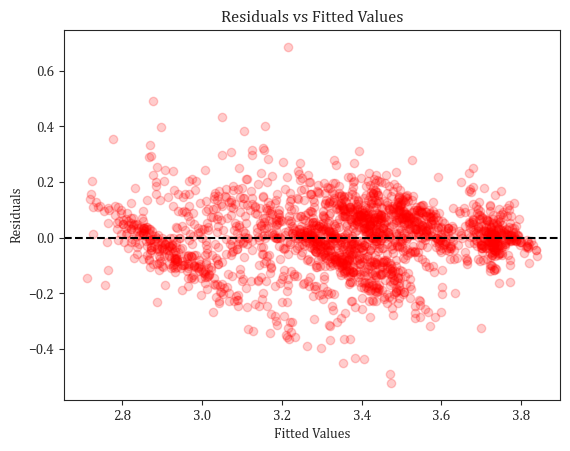

In [66]:
residuals = final_polynomial_model.resid
fitted = final_polynomial_model.fittedvalues

# Plot residuals vs fitted values
plt.scatter(fitted, residuals, alpha=0.2,color='r')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

### Interpretation

Das Modell nach Anwendung der Log-Transformation auf die Zielvariable und der Erstellung von Polynomialfeatures zeigt in der Grafik eine relativ gleichmäßige Verteilung der Residuen um die Null-Linie. Dies zeigt uns, dass die Varianz der Fehler weitgehend konstant ist. Die kleineren Achsenwerte weisen darauf hin, dass die Log-Transformation die Kontrolle über die Residuen verbessert hat. Es gibt keine auffälligen Muster oder Strukturen, was zeigt, dass das Modell keine systematischen Fehler aufweist.

Im Vergleich dazu zeigt die Grafik des Vorgängermodells ohne Transformationen eine trichterförmige Verteilung der Residuen, was auf Heteroskedastizität hinweist, also eine nicht konstante Varianz der Fehler. Das zeigt uns, dass das Modell eindeutig verbessert wurde.

### Begründung des Vorgehens

In diesem Abschnitt bewerten wir erneut die Leistung unseres Modells durch die Erstellung und Analyse einer Konfusionsmatrix. Die Konfusionsmatrix gibt Aufschluss über die Übereinstimmungen und Abweichungen zwischen den tatsächlichen und den vorhergesagten BMI-Kategorien unseres überarbeiteten Modells. Sie hilft dabei, die Genauigkeit und Verteilung der Klassifikationsergebnisse zu verstehen.

In [67]:
def get_log_bmi_category(bmi_value: float) -> str:
    categories = {
        'Untergewicht': (0, 18.5),
        'Normalgewicht': (18.5, 25),
        'Übergewicht_Leicht': (25, 27.5),
        'Übergewicht_Stark': (27.5, 30),
        'Fettleibig': (30, 35),
        'Stark_Fettleibig': (35, 37.5),
        'Sehr_Stark_Fettleibig': (37.5, 200), # BMI 200? No problem: https://de.wikipedia.org/wiki/Jon_Brower_Minnoch 
    }
    bmi_value = np.exp(bmi_value)
    for category, (min_bmi, max_bmi) in categories.items():
        # Check if the BMI value falls within the range of the current category
        if bmi_value >= min_bmi and bmi_value < max_bmi:
            return category
    # If the BMI value does not fall within any range, return None
    return None


Classification Report Model 2:
                       precision    recall  f1-score   support

           Fettleibig       0.38      0.55      0.45       352
        Normalgewicht       0.50      0.68      0.57       286
Sehr_Stark_Fettleibig       0.94      0.77      0.85       387
     Stark_Fettleibig       0.45      0.25      0.32       191
         Untergewicht       0.86      0.50      0.63       265
   Übergewicht_Leicht       0.47      0.33      0.39       322
    Übergewicht_Stark       0.25      0.37      0.30       223

             accuracy                           0.52      2026
            macro avg       0.55      0.49      0.50      2026
         weighted avg       0.57      0.52      0.53      2026



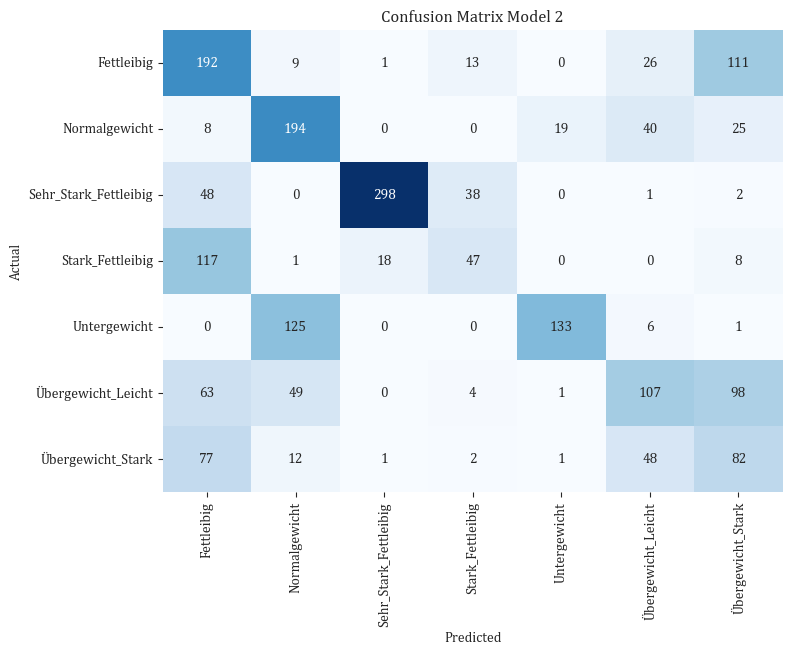

In [68]:
comparison_df = pd.DataFrame({
    'y_values': y_values_scaled,
    'fitted': fitted,
    'residuals': residuals
})

# add category columns and round values
comparison_df['fitted'] = comparison_df['fitted'].round(2)
comparison_df['residuals'] = comparison_df['residuals'].round(2)
comparison_df['bmi_category'] = comparison_df['y_values'].apply(get_log_bmi_category)
comparison_df['bmi_category_fitted'] = comparison_df['fitted'].apply(get_log_bmi_category)


conf_matrix = confusion_matrix(comparison_df['bmi_category'], comparison_df['bmi_category_fitted'])

class_report = classification_report(comparison_df['bmi_category'], comparison_df['bmi_category_fitted'])
print("\nClassification Report Model 2:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=sorted(comparison_df['bmi_category'].unique()), 
            yticklabels=sorted(comparison_df['bmi_category'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Model 2')
plt.show()

### Interpretation
Die Konfusionsmatrix zeigt, dass das zweite Modell in einigen Kategorien wesentlich höhere Übereinstimmungen aufweist.

Auch der Klassifikationsreport meldet eine Präzision von ~50%, also eine starke Verbesserung im Vergleich zu ~40%.

Im Vergleich zu unserer ersten Model zeigt sich, dass die Korrektklassifizierungen insgesamt niedriger sind. Insbesondere in den Kategorien "Normalgewicht" und "Untergewicht". Fehlklassifikationen sind aber in ähnlicher Weise vorhanden, wobei "Übergewicht Leicht" und "Übergewicht Stark" weiterhin problematisch sind.

# Finale Schlussfolgerungen und Fazit

In dieser Abgabe wurde ein Regressionsmodell zur Vorhersage des Gewichtslevels von Personen basierend auf verschiedenen Merkmalen erstellt. Der Datensatz, der für die Analyse verwendet wurde, enthielt demografische Informationen, Verhaltensweisen und andere relevante Faktoren. Um den Einfluss der verschiedenen Merkmale auf das Gewichtsniveau besser zu verstehen, wurden zwei Modelle entwickelt welche sich in im wesentlichen in 4 Dingen unterscheiden:
- die Transformation (hier: Skalierung) der X und Y Werte
- die Vorbearbeitung der eingespeisten Daten im Allgemeinen
- die Interpretierbarkeit des Modells
- die Leistungsfähigkeit (R2 und Präzision) des Modells

Die Daten wurden zunächst bereinigt und kategorische Variablen in numerische Werte umgewandelt. Es wurden neue Features erstellt, um zusätzliche Informationen aus den vorhandenen Daten zu extrahieren. Die Anzahl der Variablen wurde im 1. Modell vorsichtig auf ein Minimum reduziert.

Durch die Anwendung der Log-Transformation und die Erstellung von Polynomialfeatures konnten im 2. Modell deutliche Verbesserungen erzielt werden. Die Korrektklassifizierungsraten stiegen, was auf eine verbesserte Modellleistung hinweist. Das verbesserte Modell zeigte eine höhere Präzision (~50%) im Vergleich zum ursprünglichen Modell (~40%).

Die Modelle wurden anhand von Metriken wie dem Mean Squared Error (MSE) und dem R² bewertet. Die Ergebnisse zeigten, dass neben den offensichtlichen Einflussfaktoren sportliche Aktivität und Kalorienaufnahme auch andere Faktoren wie familiäre Vorgeschichte oder Alkoholkonsum, eine wichtige Rolle bei der Entwicklung von Übergewicht spielen.

Insgesamt konnte ein robustes Modell entwickelt werden, das eine zufriedenstellende Vorhersagegenauigkeit bietet und wertvolle Einblicke in die Determinanten von Übergewicht liefert. Diese Erkenntnisse sind entscheidend für die Entwicklung gezielter Präventionsmaßnahmen und Interventionen zur Bekämpfung von Übergewicht. Trotz einiger Herausforderungen, wie dem Umgang mit fehlenden Daten und der Notwendigkeit, gewisse Annahmen zu treffen, wurde ein umfassendes und informatives Modell erstellt, das die wesentlichen Einflussfaktoren auf das Gewichtsniveau identifiziert.

Trotz der Fortschritte und der verbesserten Modellpräzision bleiben Fehlklassifikationen bestehen, insbesondere in den Kategorien "Übergewicht Leicht" und "Übergewicht Stark". Diese Schwächen deuten darauf hin, dass das Modell noch nicht perfekt ist und weiter verbessert werden kann, um die Trennung zwischen ähnlichen BMI-Kategorien zu optimieren. Hier haben wir im Rahmen der Korrelationsanalyse bereits kurze Vorschläge geliefert welchen Aspekte bei der nächsten Datenerhebung zu Übergewicht mehr Aufmerksamkeit schenken könnte.

# CODE ANLAGEN

```python




hf_mapping = {'Gelegentlich': 1, 'Häufig': 3, 'Täglich': 2, 'nein': 0}
hf_columns = ['Zwischen_Mahlzeiten','Alkohol']
for hf_col in hf_columns:
    raw_dataframe[hf_col] = raw_dataframe[hf_col].map(hf_mapping)

gender_mapping = {'weiblich': 0, 'männlich': 1} # not sexist, just for convenience to avoid dummy var!!! <3
raw_dataframe['Geschlecht'] = raw_dataframe['Geschlecht'].map(gender_mapping)

# Map yes and no
yes_no_mapping = {'nein': 0, 'ja': 1}
yes_no_columns = ['Kalorienreich','Raucher','Kalorien_Zählen','Vorgeschichte_Familie']
for yn_col in yes_no_columns:
    raw_dataframe[yn_col] = raw_dataframe[yn_col].map(yes_no_mapping)


dummy_columns = ['Augenfarbe','Beruf','Weg_Arbeit']
raw_dataframe = pd.get_dummies(raw_dataframe, columns=dummy_columns, drop_first=True)
for column in raw_dataframe.columns:
    if column.startswith(tuple(dummy_columns)):
        raw_dataframe[column] = raw_dataframe[column].astype(int)
raw_dataframe.head()

# -----------------------------------------------------------

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have your data in X_values and y_values

# Add a constant to the predictor variables
Xsm = sm.add_constant(X_values)

# Fit the OLS model
model = sm.OLS(y_values, Xsm).fit()

# Calculate Cook's distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Plot Cook's distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance for Each Observation")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

# Determine the threshold for influential points
threshold = 4 / len(y_values)
influential_points = np.where(cooks_d > threshold)[0]

# Print influential points
print(f"Influential points (index): {influential_points}")
print(f"Number of influential points: {len(influential_points)}")

# Remove influential points from the dataset
X_values.drop(index=influential_points, inplace=True)
y_values.drop(index=influential_points, inplace=True)

# # Refit the model without influential points
# Xsm_cleaned = sm.add_constant(X_values_cleaned)
# model_cleaned = sm.OLS(y_values_cleaned, Xsm_cleaned).fit()

# # Print summary of the cleaned model
# print(model_cleaned.summary())

# Removing the outliers by using cook's distance improved our model to R2 = 0.551

# --------------------------

Influential points (index): [   6    8   19   20   28   39   41   45   47   50   65   67   69   71
   72   86   98  104  114  116  136  153  155  156  160  188  193  200
  203  207  218  220  221  223  239  241  242  244  246  248  262  285
  288  307  313  324  332  343  345  347  358  365  373  396  397  398
  409  417  446  455  461  468  491  502  506  521  538  563  565  607
  634  635  637  640  657  696  780  918  964 1463 1821]
Number of influential points: 81




# Datenbeschaffung + First Look
import pandas as pd

raw_dataframe = pd.read_csv("gewicht2026.csv", sep=";") 

# remove display limitation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
erster Check via Gesamtansicht

TODOs
	- clean data if necessary
	- transform data types
	- create dummy variables for categorical
	- visualize data
	- cut out outliers ? using statistical methods (e.g., Z-score, IQR) -> see slides

    - Normalize or standardize numerical data to facilitate model convergence.
    - Encode categorical variables using techniques such as one-hot encoding or label encoding.

	- check for multicollinearity (correlation matrices)

Correlation Analysis:

Compute Pearson or Spearman correlation coefficients to assess linear or monotonic relationships.
Use heatmaps to visualize correlation matrices and identify multicollinearity.

Pearson or Spearman correlation for linear/monotonic relationships
raw_dataframe.head()
Daten korrekt eingelesen, die CSV scheint relativ clean zu sein

Datensatz hat auch keine NaN Werte

Datenformate?
raw_dataframe.info()
# Datenbereinigung
for column_with_wrong_number_format in ['Alter','Größe','Gewicht','Schlaf']:
    raw_dataframe[column_with_wrong_number_format] = raw_dataframe[column_with_wrong_number_format].str.replace(',', '.').astype(float).round(2)

# add BMI
raw_dataframe['BMI'] = (raw_dataframe['Gewicht'] / (raw_dataframe['Größe'] ** 2)).round(2)
raw_dataframe.head()
# Iterate over columns and print unique values if the datatype is not float64
for column in raw_dataframe.columns:
    if raw_dataframe[column].dtype != 'float64':
        unique_values = raw_dataframe[column].unique()
        print(f"Merkmalsausprägungen '{column}':"," "*(25-len(column)), unique_values)
nun zu den anderen Kategorien
Manche sind ordinal (wie unsere BMI Kategorien) und manche nominal wie z.B. Augenfarbe

ordinal
müssen evtl in Ganzzahlen umgewandelt werden

nominal
müssen in 1 Hot array bzw. dummy variablen umgwandelt werden

Binäre
in 0 und 1, bietet sich v.A. bei ja/Nein an

Annahmen
Zwischen_Mahlzeiten: nein < Gelegentlich < Täglich < Häufig
hf_mapping = {'Gelegentlich': 1, 'Häufig': 3, 'Täglich': 2, 'nein': 0}
hf_columns = ['Zwischen_Mahlzeiten','Alkohol']
for hf_col in hf_columns:
    raw_dataframe[hf_col] = raw_dataframe[hf_col].map(hf_mapping)

gender_mapping = {'weiblich': 0, 'männlich': 1} # not sexist, just for convenience to avoid dummy var!!! <3
raw_dataframe['Geschlecht'] = raw_dataframe['Geschlecht'].map(gender_mapping)

# Map yes and no
yes_no_mapping = {'nein': 0, 'ja': 1}
yes_no_columns = ['Kalorienreich','Raucher','Kalorien_Zählen','Vorgeschichte_Familie']
for yn_col in yes_no_columns:
    raw_dataframe[yn_col] = raw_dataframe[yn_col].map(yes_no_mapping)


dummy_columns = ['Augenfarbe','Beruf','Weg_Arbeit']
raw_dataframe = pd.get_dummies(raw_dataframe, columns=dummy_columns, drop_first=True)
for column in raw_dataframe.columns:
    if column.startswith(tuple(dummy_columns)):
        raw_dataframe[column] = raw_dataframe[column].astype(int)
raw_dataframe.head()
# Für die Nutzung des BMI als Y müssen wir die ursprüngliche Aufteilung wiederherstellen
# Wir müssen herausfinden, welche Grenzen die Eigenschaft "Level" hat i.S.d BMIs
grouped_raw_df = raw_dataframe.groupby('Level')

# Iterate over each group
for name, group in grouped_raw_df:
    # Print the minimum and maximum BMI for the current group
    print(f"Level: {name}")
    print(f"Minimum BMI: {group['BMI'].min()}  Maximum BMI: {group['BMI'].max()}")
    print()
leider überlappen sich manche Werte hinsichtlich des BMIs, wir müssen also die Intervallgrenzen manuell etwas anpassen unter Zuhilfenahme von https://de.wikipedia.org/wiki/Body-Mass-Index
def get_bmi_category(bmi_value: float) -> str:
    categories = {
        'Untergewicht': (0, 18.5),
        'Normalgewicht': (18.5, 25),
        'Übergewicht_Leicht': (25, 27.5),
        'Übergewicht_Stark': (27.5, 30),
        'Fettleibig': (30, 35),
        'Stark_Fettleibig': (35, 37.5),
        'Sehr_Stark_Fettleibig': (37.5, 200), # BMI 200? No problem: https://de.wikipedia.org/wiki/Jon_Brower_Minnoch 
    }
    
    for category, (min_bmi, max_bmi) in categories.items():
        # Check if the BMI value falls within the range of the current category
        if bmi_value >= min_bmi and bmi_value < max_bmi:
            return category
    
    # If the BMI value does not fall within any range, return None
    return None
Wir haben also die BMI Übersetzung im Griff und droppen daher die columns "Level" sowie Größe und Gewicht

nach einem letzten Check des DataFrames auf fehlende Werte oder andere Abweichungen können wir diesen zur Weiterverarbeitung nun in numeric_dataframe umbenennen

Da wir lineare Regression verwenden müssen, sparen wir uns die Normalisierung/Skalierung der Werte
raw_dataframe.drop(columns=["Level","Größe","Gewicht"], inplace=True)
raw_dataframe.head()
raw_dataframe.info()
numeric_dataframe = raw_dataframe.copy()
correlation = numeric_dataframe.corr()['BMI'].sort_values(ascending=False)
correlation
Hier wird die erste Multikollinearität sichtbar - und zwar das zwischen BMI und Gewicht was nicht besonders verblüffend ist da wir ja den BMI aus Gewicht und Größe berechnen. 
- Vorgemerkt für Drop: Gewicht + Größe

Uns interessieren weiterhin nur entweder sehr große oder sehr kleine Werte für unser Modell

Ein paar Gedanken dazu:
Vorgeschichte_Familie     0.482365  "schweren Knochen"-Genetik oder wohl eher Gewohnheiten+Erziehung
Gemüse                    0.259369  Das wundert mich ehrlich, eigtl umgedreht?
Kalorienreich             0.245575  Okay logisch
Alter                     0.244050  Weniger Bewegung, Mehr Einkommen, weniger Stress
...
Kalorien_Zählen          -0.186512  Macht Sinn
Sport                    -0.261913  Auch logisch
Geräte                   -0.300970  seltsam, d.h. die und Fernsehkartoffeln ist tendenziell schlanker ?
Zwischen_Mahlzeiten      -0.377781  total konterintuitiv - sagt man nicht Zwischenmahlzeiten sind schlecht?

However, wir müssen aber noch Kollinearität zwischen Variablen checken mittels dem

### Variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your predictor variables DataFrame

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame()
X_vif = numeric_dataframe.copy()
X_vif.drop(columns="BMI",inplace=True) # BMI is our Y
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)
Von ChatGPT:
Looking at your VIF results:

Variables with VIF values below 5 generally indicate low multicollinearity.
Variables with VIF values between 5 and 10 may have moderate multicollinearity but are often considered acceptable.
Variables with VIF values above 10 indicate potentially problematic multicollinearity.

Wir müssen checken warum Schlaf, Alter, Wasser und Gemüse so krass hohe VIF haben

dazu prüfen wir die Korrelationen unter den Variablen mit VIF Werten wo round(VIF) >= 10
import numpy as np
# Extract columns with potentially problematic VIF values
high_vif_columns = vif_data.loc[np.ceil(vif_data["VIF"]) >= 10, "Variable"].tolist()

for hVv in high_vif_columns:
    correlation_matrix = X_vif.corr()
    correlations = correlation_matrix[hVv]
    print(f"Top correlations of -{hVv}-")
    print(correlations.sort_values(ascending=False),"\n")
    # print(correlations.abs().sort_values(ascending=False)[1:6],"\n")
Überlegungen dazu (basiert auch auf check der nicht-Betrag-Korrelationen!)
Uns bleibt nichts anderes übrig als manuell die Variablen zu prüfen.. natürlich kann man das teilweise automatisieren aber wir müssen ja dazu trotzdem erstmal die Daten checken... kein Bock

Anbei die Korrelationen UNTER den Variablen in Klammern () und die Korrelation der genannten Variablen mit dem BMI in Betragsstrichen ||

Schlaf: keine, WARUM hoher VIF 
Alter: Weg_Arbeit_Öffentliche (-0.54) -> je jünger desto mehr Öffis, logisch (Weg_Arbeit_Öffentliche hat nur 0.092 Korrelation mit BMI -> raus)
Wasser: Sport (0.266) -> klar wer sich mehr bewegt trinkt mehr... eins muss weg - Sport ist aber wesentlich wichtiger für BMI Vorhersage (Wasser |-0.015389| < Sport |-0.261913|) daher fliegt Wasser
Gemüse: Geschlecht (-0.314) -> Frauen essen mehr Gemüse als Männer (you don't say); wir schmeißen Geschlecht raus da es mit |-0.048250| weniger stark mit BMI korreliert als Gemüse |0.259369| --> Gemüse macht also dick!! Ich wusste es !! SCHNITZEL FOR EVER !!
Anzahl_Mahlzeiten: mit Sport und Gemüse (je ca. 0.135) -> diese beiden sind aber wichtig |-0.261913| bzw. |0.259369|, daher fliegt Anzahl_Mahlzeiten wg. nur |0.070372|
Kalorienreich: Vorgeschichte_Familie (0.21) klar wenn Mama+Papa nur Pommes servieren, und Kalorien_Zählen (-0.19) die Weight Wachters Gang haahaha sind beide mit |0.482365| und |-0.186512| zu relevant um sie einfach zu droppen
properties_to_drop_based_on_vfi = ["Weg_Arbeit_Öffentliche","Wasser","Geschlecht","Anzahl_Mahlzeiten"]
numeric_dataframe.drop(columns=properties_to_drop_based_on_vfi,inplace=True)

# Split numeric dataframe into X and y values
X_values = numeric_dataframe.copy()
X_values.drop(columns="BMI",inplace=True)
y_values = numeric_dataframe.copy()
y_values = y_values["BMI"]
### Lineares Modell als Ausgangspunkt für Anhaltspunkt für weitere Untersuchungen
import statsmodels.api as sm

Xsm = sm.add_constant(X_values)
# Fit the OLS model
model = sm.OLS(y_values, Xsm).fit()
# Get predictions
predictions = model.predict(Xsm) 
# Print model summary
print_model = model.summary()
print(print_model)
### Ausreißer bereinigen
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have your data in X_values and y_values

# Add a constant to the predictor variables
Xsm = sm.add_constant(X_values)

# Fit the OLS model
model = sm.OLS(y_values, Xsm).fit()

# Calculate Cook's distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Plot Cook's distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance for Each Observation")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

# Determine the threshold for influential points
threshold = 4 / len(y_values)
influential_points = np.where(cooks_d > threshold)[0]

# Print influential points
print(f"Influential points (index): {influential_points}")
print(f"Number of influential points: {len(influential_points)}")

# Remove influential points from the dataset
X_values.drop(index=influential_points, inplace=True)
y_values.drop(index=influential_points, inplace=True)

# # Refit the model without influential points
# Xsm_cleaned = sm.add_constant(X_values_cleaned)
# model_cleaned = sm.OLS(y_values_cleaned, Xsm_cleaned).fit()

# # Print summary of the cleaned model
# print(model_cleaned.summary())

# Removing the outliers by using cook's distance improved our model to R2 = 0.551
# Stepwise Regression
we used a combination of the code samples in "Regression.ipynb" together with a plot for adjusted R2 which has the layout of our Assignment_1 plots
# Import libaries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Assignment 1 seaborn style
sns.set_style("ticks", {'axes.grid': False})
plt.rcParams['font.family'] = 'Cambria'
model.pvalues.plot(kind='bar', logy=True)
p_values = model.pvalues.sort_values(ascending=True)
columns_by_p_values = p_values.index.to_list()
c_i = columns_by_p_values.index('const')
columns_by_p_values.remove('const') # kann nicht verarbeitet werden
p_value_list = model.pvalues.values
p_value_list = np.sort(np.delete(p_value_list, c_i)).tolist()
Nun werden wir mit einer art "custom sequential feature selector" (der Standard Selector tut irgendwie nicht richtig hinsichtlich der P Values) die adjustierten R2 checken
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

lm = LinearRegression()

best_adj_r2, best_subset  = -np.inf, None
num_features_list, r2_list, adj_r2_list = [], [], []

for nf in range(1, len(columns_by_p_values)+1):

    # Custom selection based on first model
    selected_features = columns_by_p_values[:nf]
    selected_X = X_values[selected_features]
    
    # Fit the model with the selected features
    
    lm.fit(selected_X, y_values)
    
    # Calculate R² and adjusted R²
    r2 = lm.score(selected_X, y_values)
    n = len(y_values)
    p = nf
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    # Update the best adjusted R² and best subset if necessary
    if adj_r2 > best_adj_r2:
        best_adj_r2 = adj_r2
        best_subset = selected_features
    
    # Append the number of features and adjusted R² to the lists
    print(f"Number of Features: {nf},R²: {r2} Adjusted R²: {adj_r2}")
    print("Subset: ", selected_features,"\n")
    num_features_list.append(nf)
    adj_r2_list.append(adj_r2)
    r2_list.append(r2)

print("Best Subset of Features:", best_subset)
print("Best Adjusted R²:", best_adj_r2)

# Plot the number of features vs. adjusted R²
plt.figure(figsize=(10, 6))

# Create the first y-axis for adj_r2_list
ax1 = plt.gca()
sns.lineplot(x=num_features_list, y=adj_r2_list, color='red', alpha=0.5, ax=ax1, label='Adjustiertes R²')
sns.lineplot(x=num_features_list, y=r2_list, color='orange', alpha=0.5, ax=ax1, label='R²')
ax1.set_xlabel('Anzahl Variablen')
ax1.set_ylabel('Adjustiertes R²', color='red')
ax1.grid(axis='y', linestyle='-', linewidth=0.5, color='black', alpha=0.2)
# ax1.set_xticks([f"{i}: [+{columns_by_p_values[i-1]}]" for i in range(1, 20)])
# ax1.set_xticklabels([f"{i}: [+{columns_by_p_values[i-1]}]" for i in range(1, 20)])
ax1.set_xticks(range(1, 20))

ax1.set_ylim(0,0.6)
ax2 = ax1.twinx()
sns.lineplot(x=num_features_list, y=p_value_list, marker="^", color='blue', alpha=0.5, ax=ax2, label='P-Wert')
ax2.set_ylabel('P-Wert', color='blue')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.get_legend().remove()
ax1.get_legend().remove()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.axvline(x=9, color='black', linestyle='--', alpha=0.3)
plt.title('Anzahl Variablen vs. Adjustiertes R² and P-Wert')
plt.show()

Das sieht doch schonmal halbwegs okay und nachvollziehbar aus. Man sieht gut, das wirklich alle Features mit einem P-Wert über 0.01  darstellen und gedropped werden können... es bleiben also die ersten 9 X Variablen
['Vorgeschichte_Familie',
 'Gemüse',
 'Zwischen_Mahlzeiten',
 'Sport',
 'Geräte',
 'Kalorienreich',
 'Alkohol',
 'Kalorien_Zählen',
 'Alter']
... wo liegt noch Verbesserungspotenzial? ... warum kein höherer R2?
Eine Vermutung wäre, dass wir ja hier versuchen den konkreten BMI vorauszusagen, jedoch ist es "nur" eine Klassifizierung geht

wir müssen das Modell sowie die Annahmen (Assumptions) prüfen
Multikollinearität 
Durch Kreation der Dummy Variablen sind diese untereinander perfekt kollinear. Wir müssen also wie im Unterricht erwähnt eine davon als "Referenzvariable" droppen, zum Glück gibt es dafür eine Standardfunktion via data = pd.get_dummies(data, columns=categorical_columns, drop_first=True), der Code wurde nachträglich so angepasst
X_values = X_values[columns_by_p_values[:9]] 
display(X_values.head())# sieht schon übersichtlicher aus

Xsm = sm.add_constant(X_values)
# Fit the OLS model
new_model = sm.OLS(y_values, Xsm).fit()
# Get predictions
predictions = new_model.predict(Xsm) 
# Print model summary
print(new_model.summary())
dieses Modell (new_model) besitzt die gleiche R2-Präzision (0.483) die das Vorherige (0.486) bei einem Bruchteil der Variablen
# Prüfung der Annahmen
## Linearität
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Columns to plot against BMI
selected_columns = columns_by_p_values[:9] + ["BMI"]

# Iterate over the first 9 columns
for i, col in enumerate(columns_by_p_values[:9]):
    sns.regplot(x=numeric_dataframe[col], y=numeric_dataframe["BMI"], ax=axes[i], color='black', scatter_kws={'alpha': 0.05}, line_kws={'color': 'red'})
    axes[i].set_title(f'{col} vs. BMI')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set overall title and display the plot
plt.suptitle('Plot der X-Variablen vs. y (BMI) mit Regressionslinie', fontsize=16, fontweight='bold', y=1.01)

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top to make space for the suptitle
plt.show()

plt.show()

## Normalverteilung der Residuen
residuals = new_model.resid

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of residuals
sns.histplot(y_values, bins=30, kde=True, color='red', ax=ax[0])
# sns.histplot(residuals, bins=30, kde=True, color='red', ax=ax[0])
# ax[0].set_title('Histogramm der Residuen', fontsize=16, fontweight='bold')
# ax[0].set_xlabel('Residuals')
ax[0].set_title('Histogram der Actual Y Werte')
ax[0].set_xlabel('Y-Werte')
ax[0].set_ylabel('Häufigkeit')
ax[0].grid(True)


# QQ plot of residuals
sm.qqplot(residuals, line='45', alpha=0.5,fit=True, ax=ax[1])
ax[1].set_title('QQ-Plot der Residuen', fontsize=16, fontweight='bold')
ax[1].set_ylabel('Theoretische Quantile')
ax[1].set_xlabel('Y-Werte')
ax[1].grid(True)

plt.tight_layout()
plt.show()

## homoskedastische Fehler von  ε
### Plot der Residuen
# Get the residuals and fitted values
residuals = new_model.resid
fitted = new_model.fittedvalues

# Plot residuals vs fitted values
plt.scatter(fitted, residuals, alpha=0.2,color='r')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# the result of this plot here sucks ass
# It means there is probably no linear relation between our dependent (y) and independet variables (X)
comparison_df = pd.DataFrame({
    'y_values': y_values,
    'fitted': fitted,
    'residuals': residuals
})

# add category columns and round values
comparison_df['fitted'] = comparison_df['fitted'].round(2)
comparison_df['residuals'] = comparison_df['residuals'].round(2)
comparison_df['bmi_category'] = comparison_df['y_values'].apply(get_bmi_category)
comparison_df['bmi_category_fitted'] = comparison_df['fitted'].apply(get_bmi_category)

comparison_df.head()
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
conf_matrix = confusion_matrix(comparison_df['bmi_category'], comparison_df['bmi_category_fitted'])

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print classification report
class_report = classification_report(comparison_df['bmi_category'], comparison_df['bmi_category_fitted'])
print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=sorted(comparison_df['bmi_category'].unique()), 
            yticklabels=sorted(comparison_df['bmi_category'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Datenbeschaffung + First Look
import pandas as pd
import numpy as np
raw_dataframe = pd.read_csv("gewicht2026.csv", sep=";") 

# remove display limitation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
erster Check via Gesamtansicht

TODOs
	- clean data if necessary
	- transform data types
	- create dummy variables for categorical
	- visualize data
	- cut out outliers ? using statistical methods (e.g., Z-score, IQR) -> see slides

    - Normalize or standardize numerical data to facilitate model convergence.
    - Encode categorical variables using techniques such as one-hot encoding or label encoding.

	- check for multicollinearity (correlation matrices)

Correlation Analysis:

Compute Pearson or Spearman correlation coefficients to assess linear or monotonic relationships.
Use heatmaps to visualize correlation matrices and identify multicollinearity.

Pearson or Spearman correlation for linear/monotonic relationships
raw_dataframe.head()
Daten korrekt eingelesen, die CSV scheint relativ clean zu sein

Datensatz hat auch keine NaN Werte

Datenformate?
raw_dataframe.info()
# Data Munge
for column_with_wrong_number_format in ['Alter','Größe','Gewicht','Schlaf']:
    raw_dataframe[column_with_wrong_number_format] = raw_dataframe[column_with_wrong_number_format].str.replace(',', '.').astype(float).round(2)

# add BMI
import numpy as np
raw_dataframe['BMI'] = np.log(( (raw_dataframe['Gewicht'] / (raw_dataframe['Größe'] ** 2)) ))
# raw_dataframe['BMI'] = (raw_dataframe['Gewicht'] / (raw_dataframe['Größe'] ** 2)).round(2)
raw_dataframe.head()
# Iterate over columns and print unique values if the datatype is not float64
for column in raw_dataframe.columns:
    if raw_dataframe[column].dtype != 'float64':
        unique_values = raw_dataframe[column].unique()
        print(f"Merkmalsausprägungen '{column}':"," "*(25-len(column)), unique_values)

for_boxplot_df = raw_dataframe.copy()
nun zu den anderen Kategorien
Manche sind ordinal (wie unsere BMI Kategorien) und manche nominal wie z.B. Augenfarbe

ordinal
müssen evtl in Ganzzahlen umgewandelt werden

nominal
müssen in 1 Hot array bzw. dummy variablen umgwandelt werden

Binäre
in 0 und 1, bietet sich v.A. bei ja/Nein an

Annahmen
Zwischen_Mahlzeiten: nein < Gelegentlich < Täglich < Häufig

aus dem späteren Verlauf stellte sich heraus: 'Zwischen_Mahlzeiten' hat keinen linearen Zusammenhang, auch 'Gemüse' 'Alkohol' 'Geräte' und 'Sport' nicht, von daher werden alle in Dummy Variablen umgewandelt
# hf_mapping = {'Gelegentlich': 1, 'Häufig': 3, 'Täglich': 2, 'nein': 0}
# hf_columns = ['Zwischen_Mahlzeiten','Alkohol']
# for hf_col in hf_columns:
#     raw_dataframe[hf_col] = raw_dataframe[hf_col].map(hf_mapping)

gender_mapping = {'weiblich': 0, 'männlich': 1} # not sexist, just for convenience to avoid dummy var!!! <3
raw_dataframe['Geschlecht'] = raw_dataframe['Geschlecht'].map(gender_mapping)

# Map yes and no
yes_no_mapping = {'nein': 0, 'ja': 1}
yes_no_columns = ['Kalorienreich','Raucher','Kalorien_Zählen','Vorgeschichte_Familie']
for yn_col in yes_no_columns:
    raw_dataframe[yn_col] = raw_dataframe[yn_col].map(yes_no_mapping)


dummy_columns = ['Augenfarbe','Beruf','Weg_Arbeit','Zwischen_Mahlzeiten','Alkohol','Sport','Gemüse','Geräte']
raw_dataframe = pd.get_dummies(raw_dataframe, columns=dummy_columns, drop_first=True)
for column in raw_dataframe.columns:
    if column.startswith(tuple(dummy_columns)):
        raw_dataframe[column] = raw_dataframe[column].astype(int)
raw_dataframe.head()
# Für die Nutzung des BMI als Y müssen wir die ursprüngliche Aufteilung wiederherstellen
# Wir müssen herausfinden, welche Grenzen die Eigenschaft "Level" hat i.S.d BMIs
grouped_raw_df = raw_dataframe.groupby('Level')

# Iterate over each group
for name, group in grouped_raw_df:
    # Print the minimum and maximum BMI for the current group
    print(f"Level: {name}")
    print(f"Minimum BMI: {group['BMI'].min()}  Maximum BMI: {group['BMI'].max()}")
    print()
leider überlappen sich manche Werte hinsichtlich des BMIs, wir müssen also die Intervallgrenzen manuell etwas anpassen unter Zuhilfenahme von https://de.wikipedia.org/wiki/Body-Mass-Index
def get_bmi_category(bmi_value: float) -> str:

    """
    'Untergewicht': (0, 18.5),
        'Normalgewicht': (18.5, 25),
        'Übergewicht_Leicht': (25, 27.5),
        'Übergewicht_Stark': (27.5, 30),
        'Fettleibig': (30, 35),
        'Stark_Fettleibig': (35, 37.5),
        'Sehr_Stark_Fettleibig': (37.5, 200)
    """
    categories = {
        'Untergewicht': (0, 18.5),
        'Normalgewicht': (18.5, 25),
        'Übergewicht_Leicht': (25, 27.5),
        'Übergewicht_Stark': (27.5, 30),
        'Fettleibig': (30, 35),
        'Stark_Fettleibig': (35, 37.5),
        'Sehr_Stark_Fettleibig': (37.5, 200), # BMI 200? No problem: https://de.wikipedia.org/wiki/Jon_Brower_Minnoch 
    }
    
    bmi_value = (np.exp(bmi_value))

    for category, (min_bmi, max_bmi) in categories.items():
        # Check if the BMI value falls within the range of the current category
        if bmi_value >= min_bmi and bmi_value < max_bmi:
            return category
    
    # If the BMI value does not fall within any range, return None
    return None
from matplotlib import pyplot as plt
import seaborn as sns

for_boxplot_df['custom_Level'] = for_boxplot_df.apply(lambda row: get_bmi_category(row['BMI']),axis=1)

order = ['Untergewicht', 'Normalgewicht', 'Übergewicht_Leicht', 'Übergewicht_Stark', 
         'Fettleibig', 'Stark_Fettleibig', 'Sehr_Stark_Fettleibig']
figsize = (12, 1.2 * len(for_boxplot_df['Level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(for_boxplot_df, x='BMI', y='Level', inner='box', order=order)
plt.grid(axis='x', linestyle='--', alpha=1)  # Insert vertical gridlines
plt.show()



Wir haben also die BMI Übersetzung im Griff und droppen daher die columns "Level" sowie Größe und Gewicht

nach einem letzten Check des DataFrames auf fehlende Werte oder andere Abweichungen können wir diesen zur Weiterverarbeitung nun in numeric_dataframe umbenennen

Da wir lineare Regression verwenden müssen, sparen wir uns die Normalisierung/Skalierung der Werte
raw_dataframe.drop(columns=["Level","Größe","Gewicht"], inplace=True)
raw_dataframe.head()
raw_dataframe.info()
numeric_dataframe = raw_dataframe.copy()
correlation = numeric_dataframe.corr()['BMI'].abs().sort_values(ascending=False)
correlation
Hier wird die erste Multikollinearität sichtbar - und zwar das zwischen BMI und Gewicht was nicht besonders verblüffend ist da wir ja den BMI aus Gewicht und Größe berechnen. 
- Vorgemerkt für Drop: Gewicht + Größe

Uns interessieren weiterhin nur entweder sehr große oder sehr kleine Werte für unser Modell

Ein paar Gedanken dazu:
Vorgeschichte_Familie     0.482365  "schweren Knochen"-Genetik oder wohl eher Gewohnheiten+Erziehung
Gemüse                    0.259369  Das wundert mich ehrlich, eigtl umgedreht?
Kalorienreich             0.245575  Okay logisch
Alter                     0.244050  Weniger Bewegung, Mehr Einkommen, weniger Stress
...
Kalorien_Zählen          -0.186512  Macht Sinn
Sport                    -0.261913  Auch logisch
Geräte                   -0.300970  seltsam, d.hFernsehkartoffeln ist tendenziell schlanker ?
Zwischen_Mahlzeiten      -0.377781  total konterintuitiv - sagt man nicht Zwischenmahlzeiten sind schlecht?

However, wir müssen aber noch Kollinearität zwischen Variablen checken mittels dem

### Variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your predictor variables DataFrame

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame()
X_vif = numeric_dataframe.copy()
X_vif.drop(columns="BMI",inplace=True) # BMI is our Y
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)
Von ChatGPT:
Looking at your VIF results:

Variables with VIF values below 5 generally indicate low multicollinearity.
Variables with VIF values between 5 and 10 may have moderate multicollinearity but are often considered acceptable.
Variables with VIF values above 10 indicate potentially problematic multicollinearity.

Wir müssen checken warum Schlaf, Alter, Wasser und Gemüse so krass hohe VIF haben

dazu prüfen wir die Korrelationen unter den Variablen mit VIF Werten wo round(VIF) >= 10
import numpy as np
# Extract columns with potentially problematic VIF values
high_vif_columns = vif_data.loc[np.ceil(vif_data["VIF"]) >= 10, "Variable"].tolist()

for hVv in high_vif_columns:
    correlation_matrix = X_vif.corr()
    correlations = correlation_matrix[hVv]
    print(f"Top correlations of -{hVv}-")
    # print(correlations.sort_values(ascending=False),"\n")
    print(correlations.abs().sort_values(ascending=False)[1:6],"\n")
Überlegungen dazu (basiert auch auf check der nicht-Betrag-Korrelationen!)
Uns bleibt nichts anderes übrig als manuell die Variablen zu prüfen.. natürlich kann man das teilweise automatisieren aber wir müssen ja dazu trotzdem erstmal die Daten checken... kein Bock

Anbei die Korrelationen UNTER den Variablen in Klammern () und die Korrelation der genannten Variablen mit dem BMI in Betragsstrichen ||

Schlaf: keine, WARUM hoher VIF 
Alter: Weg_Arbeit_Öffentliche (-0.54) -> je jünger desto mehr Öffis, logisch (Weg_Arbeit_Öffentliche hat nur 0.092 Korrelation mit BMI -> raus)
Wasser: Sport (0.266) -> klar wer sich mehr bewegt trinkt mehr... eins muss weg - Sport ist aber wesentlich wichtiger für BMI Vorhersage (Wasser |-0.015389| < Sport |-0.261913|) daher fliegt Wasser
Gemüse: Geschlecht (-0.314) -> Frauen essen mehr Gemüse als Männer (you don't say); wir schmeißen Geschlecht raus da es mit |-0.048250| weniger stark mit BMI korreliert als Gemüse |0.259369| --> Gemüse macht also dick!! Ich wusste es !! SCHNITZEL FOR EVER !!
Anzahl_Mahlzeiten: mit Sport und Gemüse (je ca. 0.135) -> diese beiden sind aber wichtig |-0.261913| bzw. |0.259369|, daher fliegt Anzahl_Mahlzeiten wg. nur |0.070372|
Kalorienreich: Vorgeschichte_Familie (0.21) klar wenn Mama+Papa nur Pommes servieren, und Kalorien_Zählen (-0.19) die Weight Wachters Gang haahaha sind beide mit |0.482365| und |-0.186512| zu relevant um sie einfach zu droppen
# This is manual labor and should not be like that
# properties_to_drop_based_on_vfi = ["Weg_Arbeit_Öffentliche","Wasser","Geschlecht","Anzahl_Mahlzeiten"]
# numeric_dataframe.drop(columns=properties_to_drop_based_on_vfi,inplace=True)
# Include Polynomial Features

# Split numeric dataframe into X and y values
X_values = numeric_dataframe.copy()
X_values.drop(columns="BMI",inplace=True)

from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)
X_values = polynomial_features.fit_transform(X_values)


y_values = numeric_dataframe.copy()
y_values = y_values["BMI"]
### Lineares Modell als Ausgangspunkt für Anhaltspunkt für weitere Untersuchungen
import statsmodels.api as sm

Xsm = sm.add_constant(X_values)
# Fit the OLS model
model = sm.OLS(y_values, Xsm).fit()
# Get predictions
predictions = model.predict(Xsm) 
# Print model summary
print_model = model.summary()
print(print_model)
### Ausreißer-Datensätze bereinigen
# import numpy as np
# import pandas as pd
# import statsmodels.api as sm
# import matplotlib.pyplot as plt

# # Add a constant to the predictor variables
# Xsm = sm.add_constant(X_values)

# # Fit the OLS model
# model = sm.OLS(y_values, Xsm).fit()

# # Calculate Cook's distance
# influence = model.get_influence()
# cooks_d = influence.cooks_distance[0]

# # Determine the threshold for influential points
# threshold = 4 / len(y_values)
# influential_points = np.where(cooks_d > threshold)[0]

# # Remove influential points from the dataset
# X_values_cleaned = X_values.drop(index=influential_points)
# y_values_cleaned = y_values.drop(index=influential_points)

# # Re-fit the OLS model after cleansing
# model_cleaned = sm.OLS(y_values_cleaned, sm.add_constant(X_values_cleaned)).fit()

# # Calculate Cook's distance after cleansing
# influence_cleaned = model_cleaned.get_influence()
# cooks_d_cleaned = influence_cleaned.cooks_distance[0]

# # Plot Cook's distance before and after cleansing in separate subplots
# fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# # Plot Cook's distance before cleansing
# ax[0].stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", linefmt='b-')
# ax[0].set_title("Cook's Distance for Each Observation (Before Cleansing)")
# ax[0].set_xlabel("Observation Index")
# ax[0].set_ylabel("Cook's Distance")

# # Plot Cook's distance after cleansing
# ax[1].stem(np.arange(len(cooks_d_cleaned)), cooks_d_cleaned, markerfmt=",", linefmt='g-')
# ax[1].set_title("Cook's Distance for Each Observation (After Cleansing)")
# ax[1].set_xlabel("Observation Index")
# ax[1].set_ylabel("Cook's Distance")

# X_values = X_values_cleaned
# y_values = y_values_cleaned

# plt.show()


# Stepwise Regression
we used a combination of the code samples in "Regression.ipynb" together with a plot for adjusted R2 which has the layout of our Assignment_1 plots
import seaborn as sns

# Set Assignment 1 seaborn style
sns.set_style("ticks", {'axes.grid': False})
# plt.rcParams['font.family'] = 'Cambria'
## Plot der P Values / Feature Selection
# model.pvalues.plot(kind='bar', logy=True)
# Select columns based on p values

p_values = model.pvalues.sort_values(ascending=True)
columns_by_p_values = p_values.index.to_list()
c_i = columns_by_p_values.index('const')
columns_by_p_values.remove('const') # kann nicht verarbeitet werden
p_value_list = model.pvalues.values
p_value_list = np.sort(np.delete(p_value_list, c_i)).tolist()

p_value_list_filtered = [v for v in p_value_list if v <= 0.01]
selected_columns_by_p_values = columns_by_p_values[:len(p_value_list_filtered)]
## Linearitätsprüfung
# # Create a 3x3 grid of subplots
# rows_and_columns = int(np.ceil(np.sqrt(len(selected_columns_by_p_values))))
# fig, axes = plt.subplots(rows_and_columns, rows_and_columns, figsize=(12, 12))

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Columns to plot against BMI
# selected_columns = selected_columns_by_p_values + ["BMI"]

# # Iterate over the selected columns
# for i, col in enumerate(selected_columns_by_p_values):
#     if i < len(axes):
#         sns.regplot(x=numeric_dataframe[col], y=numeric_dataframe["BMI"], ax=axes[i], color='blue', scatter_kws={'alpha': 0.05}, line_kws={'color': 'red'})
#         axes[i].set_title(f'{col} vs. BMI')
#     else:
#         break 

# # Hide any remaining empty subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# # Set overall title and display the plot
# plt.suptitle('Plot der X-Variablen vs. y (BMI) mit Regressionslinie', fontsize=16, fontweight='bold', y=1.01)

# plt.tight_layout()
# plt.subplots_adjust(top=0.95)  # Adjust the top to make space for the suptitle
# plt.show()

# plt.show()

Nun werden wir mit einer art "custom sequential feature selector" (der Standard SequentialFeatureSelector tut irgendwie nicht richtig hinsichtlich der P Values) die adjustierten R2 checken
# # Import libaries
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import SequentialFeatureSelector
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np


# lm = LinearRegression()

# best_adj_r2, best_subset  = -np.inf, None
# num_features_list, r2_list, adj_r2_list = [], [], []

# for nf in range(1, len(columns_by_p_values)+1):

#     # Custom selection based on first model
#     selected_features = columns_by_p_values[:nf]
#     selected_X = X_values[selected_features]
    
#     # Fit the model with the selected features
    
#     lm.fit(selected_X, y_values)
    
#     # Calculate R² and adjusted R²
#     r2 = lm.score(selected_X, y_values)
#     n = len(y_values)
#     p = nf
#     adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

#     # Update the best adjusted R² and best subset if necessary
#     if adj_r2 > best_adj_r2:
#         best_adj_r2 = adj_r2
#         best_subset = selected_features
    
#     # Append the number of features and adjusted R² to the lists
#     # print(f"Number of Features: {nf},R²: {r2} Adjusted R²: {adj_r2}")
#     # print("Subset: ", selected_features,"\n")
#     num_features_list.append(nf)
#     adj_r2_list.append(adj_r2)
#     r2_list.append(r2)

# print("Best Subset of Features:", best_subset)
# print("Best Adjusted R²:", best_adj_r2)

# print(len(num_features_list), len(p_value_list))

# # Plot the number of features vs. adjusted R²
# plt.figure(figsize=(10, 6))

# # Create the first y-axis for adj_r2_list
# ax1 = plt.gca()
# sns.lineplot(x=num_features_list, y=adj_r2_list, color='red', alpha=0.5, ax=ax1, label='Adjustiertes R²')
# sns.lineplot(x=num_features_list, y=r2_list, color='orange', alpha=0.5, ax=ax1, label='R²')
# ax1.set_xlabel('Anzahl Variablen')
# ax1.set_ylabel('Adjustiertes R²', color='red')
# ax1.grid(axis='y', linestyle='-', linewidth=0.5, color='black', alpha=0.2)
# # ax1.set_xticks([f"{i}: [+{columns_by_p_values[i-1]}]" for i in range(1, 20)])
# # ax1.set_xticklabels([f"{i}: [+{columns_by_p_values[i-1]}]" for i in range(1, 20)])

# ax1.set_ylim(0,1)
# ax2 = ax1.twinx()
# sns.lineplot(x=num_features_list, y=p_value_list, marker="^", color='blue', alpha=0.5, ax=ax2, label='P-Wert')
# ax2.set_ylabel('P-Wert', color='blue')
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.get_legend().remove()
# ax1.get_legend().remove()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plt.axvline(x=len(selected_columns_by_p_values), color='black', linestyle='--', alpha=0.3)
# plt.title('Anzahl Variablen vs. Adjustiertes R² and P-Wert')
# plt.show()

Das sieht doch schonmal halbwegs okay und nachvollziehbar aus. Man sieht gut, das wirklich alle Features mit einem P-Wert über 0.01  darstellen und gedropped werden können...


... wo liegt noch Verbesserungspotenzial? ... warum kein höherer R2?
Eine Vermutung wäre, dass wir ja hier versuchen den konkreten BMI vorauszusagen, jedoch ist es "nur" eine Klassifizierung geht

wir müssen das Modell sowie die Annahmen (Assumptions) prüfen
Multikollinearität 
Durch Kreation der Dummy Variablen sind diese untereinander perfekt kollinear. Wir müssen also wie im Unterricht erwähnt eine davon als "Referenzvariable" droppen, zum Glück gibt es dafür eine Standardfunktion via data = pd.get_dummies(data, columns=categorical_columns, drop_first=True), der Code wurde nachträglich so angepasst

# X_values = X_values[selected_columns_by_p_values] 

# display(X_values.head())# sieht schon übersichtlicher aus

Xsm = sm.add_constant(X_values)
# Fit the OLS model
new_model = sm.OLS(y_values, Xsm).fit()
# Get predictions
predictions = new_model.predict(Xsm) 
# Print model summary
print(new_model.summary())
dieses Modell (new_model) besitzt die gleiche R2-Präzision (0.483) die das Vorherige (0.486) bei einem Bruchteil der Variablen
## Normalverteilung der Residuen
residuals = new_model.resid

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of residuals
sns.histplot(y_values, bins=30, kde=True, color='blue', ax=ax[0])
# sns.histplot(residuals, bins=30, kde=True, color='red', ax=ax[0])
# ax[0].set_title('Histogramm der Residuen', fontsize=16, fontweight='bold')
# ax[0].set_xlabel('Residuals')
ax[0].set_title('Histogram der Actual Y Werte')
ax[0].set_xlabel('Y-Werte')
ax[0].set_ylabel('Häufigkeit')
ax[0].grid(True)


# QQ plot of residuals
sm.qqplot(residuals, line='45',alpha=0.5,fit=True, ax=ax[1])
ax[1].set_title('QQ-Plot der Residuen', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Theoretische Quantile')
ax[1].set_ylabel('Beispiel-Quantile')
ax[1].grid(True)

plt.tight_layout()
plt.show()

## homoskedastische Fehler von  ε
### Plot der Residuen
# Get the residuals and fitted values
residuals = new_model.resid
fitted = new_model.fittedvalues

# Plot residuals vs fitted values
plt.scatter(fitted, residuals, alpha=0.2,color='r')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# the result of this plot here sucks ass
# It means there is probably no linear relation between our dependent (y) and independet variables (X)
Sieht erstens richtig mies aus und zweitens scheint er bei manchen predictions im höheren Bereich immer noch zu niedrig zu sein
comparison_df = pd.DataFrame({
    'y_values': y_values,
    'fitted': fitted,
    'residuals': residuals
})

# add category columns and round values
comparison_df['fitted'] = comparison_df['fitted'].round(2)
comparison_df['residuals'] = comparison_df['residuals'].round(2)
comparison_df['bmi_category'] = comparison_df['y_values'].apply(get_bmi_category)
comparison_df['bmi_category_fitted'] = comparison_df['fitted'].apply(get_bmi_category)

comparison_df.head()
## Since our task is a classification, not regression task we must also consider classification metrics
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(comparison_df['bmi_category'], comparison_df['bmi_category_fitted'])
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(comparison_df['bmi_category'], comparison_df['bmi_category_fitted'])
print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=sorted(comparison_df['bmi_category'].unique()), 
            yticklabels=sorted(comparison_df['bmi_category'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Zwischenbilanz
Obwohl die Featureselection, Thresholds der Outliers mehrfach iterativ angepasst wurde performt das Modell noch relativ schlecht... was könnte noch hineinspeielen?

Im Assignment steht nirgendwo geschrieben, dass es eine Lineare Regression sein muss. Wir können daher auf Basis unserer endgeilen Daten ein paar "potentere" Regressoren laufen lassen

Hier sollte man aber zumindest einen Validierungsdatensatz abspalten, da Modelle mit erhöhter Fähigkeit der Abstraktion zu overfitting neigen
wls_comparison_df = pd.DataFrame({
    'y_values': y_values,
    'fitted': predictions_wls,
    'residuals': residuals_wls
})

# add category columns and round values
wls_comparison_df['fitted'] = wls_comparison_df['fitted'].round(2)
wls_comparison_df['residuals'] = wls_comparison_df['residuals'].round(2)
wls_comparison_df['bmi_category'] = wls_comparison_df['y_values'].apply(get_bmi_category)
wls_comparison_df['bmi_category_fitted'] = wls_comparison_df['fitted'].apply(get_bmi_category)


conf_matrix = confusion_matrix(wls_comparison_df['bmi_category'], wls_comparison_df['bmi_category_fitted'])
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(wls_comparison_df['bmi_category'], wls_comparison_df['bmi_category_fitted'])
print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=sorted(wls_comparison_df['bmi_category'].unique()), 
            yticklabels=sorted(wls_comparison_df['bmi_category'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()